<a href="https://www.kaggle.com/code/kamalapousajja/beginner-multi-class-prediction-of-obesity-risk?scriptVersionId=166492651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Multi-Class Prediction of Obesity Risk

**Goal:**

The goal of this competition is to use various factors to predict obesity risk in individuals.

**About the Dataset:**

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition.

**The Features of this dataset include:**

* FCVC = 'Frequency of consumption of vegetables'
* NCP = 'Number of main meals'
* CH2O = 'Consumption of water daily'
* FAF = 'Physical activity frequency'
* TUE = 'Time using technology devices'
* FACV = 'Frequent consumption of high caloric food'
* CAEC = 'Consumption of food between meals'
* SMOKE = 'Smoker or not'
* SCC = 'Calories consumption monitoring'
* CALC = 'Consumption of alcohol'
* MTRANS = 'Transportation used'

**Target Features**

* Underweight
* Normal
* Overweight level I
* Overweight level II
* Obesity type I
* Obesity type II
* Obesity type III

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 

# Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
import lightgbm
from lightgbm import LGBMClassifier

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from optuna.samplers import TPESampler
import optuna

# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
# Load data

train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

In [3]:
# Inspect the train dataset

train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
# Inspect the test dataset

test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [5]:
# Inspect the sample submission dataset

sample_submission.head()

id     NObeyesdad
0  20758  Normal_Weight
1  20759  Normal_Weight
2  20760  Normal_Weight
3  20761  Normal_Weight
4  20762  Normal_Weight

In [6]:
# Merge train and test datasets, so easy for process them together

all_data = pd.concat([train,test])

all_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [7]:
# Get the information of all dataset

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34598 entries, 0 to 13839
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Gender                          34598 non-null  object 
 2   Age                             34598 non-null  float64
 3   Height                          34598 non-null  float64
 4   Weight                          34598 non-null  float64
 5   family_history_with_overweight  34598 non-null  object 
 6   FAVC                            34598 non-null  object 
 7   FCVC                            34598 non-null  float64
 8   NCP                             34598 non-null  float64
 9   CAEC                            34598 non-null  object 
 10  SMOKE                           34598 non-null  object 
 11  CH2O                            34598 non-null  float64
 12  SCC                             34598

In [8]:
# Get the statistical summary of the numeric columns

all_data.describe()

id           Age        Height        Weight          FCVC  \
count  34598.000000  34598.000000  34598.000000  34598.000000  34598.000000   
mean   17298.500000     23.886181      1.699721     87.686451      2.444704   
std     9987.726643      5.733207      0.087895     26.273493      0.532568   
min        0.000000     14.000000      1.450000     39.000000      1.000000   
25%     8649.250000     20.000000      1.631856     66.000000      2.000000   
50%    17298.500000     22.851747      1.700000     84.000000      2.392179   
75%    25947.750000     26.000000      1.761773    111.539494      3.000000   
max    34597.000000     61.000000      1.980000    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  34598.000000  34598.000000  34598.000000  34598.000000  
mean       2.757043      2.030469      0.978861      0.614467  
std        0.707610      0.609566      0.839122      0.604475  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.784710      0.006892      0.000000  
50%        3.000000      2.000000      1.000000      0.555591  
75%        3.000000      2.550570      1.583832      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [9]:
# Get the Statistical summary of the category columns

all_data.describe(include='object')

Gender family_history_with_overweight   FAVC       CAEC  SMOKE    SCC  \
count    34598                          34598  34598      34598  34598  34598   
unique       2                              2      2          4      2      2   
top     Female                            yes    yes  Sometimes     no     no   
freq     17387                          28398  31565      29218  34173  33447   

             CALC                 MTRANS        NObeyesdad  
count       34598                  34598             20758  
unique          4                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        25045                  27798              4046

# Data Cleaning

In [10]:
# Check the missing values of train dataset

train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No missing values in train dataset

In [11]:
# Check the missing values of test dataset

test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

No missing values in test dataset

In [12]:
# Check the duplicate values

all_data.duplicated().sum()

0

No duplicate values in the dataset

In [13]:
# Rename of the columns of the dataset

all_data.rename(columns={'family_history_with_overweight': 'Family_history',
                     'FAVC': 'High_cal_food', 
                     'FCVC' : 'Vege_food',
                     'NCP' : 'Main_meal',
                     'CAEC' : 'Food_between_meal',
                     'SMOKE' : 'Smoke',
                     'CH2O': 'Water_consumption',
                     'SCC': 'Calories_monitor',
                     'FAF': 'Physical_activity_frequency',
                     'TUE' : 'Time_using_electronic',
                     'CALC': 'Alcohol_consumption',
                     'MTRANS': "Transport",
                     'NObeyesdad': 'Obesity_level'}, 
                inplace=True)

all_data.head()

id  Gender        Age    Height      Weight Family_history High_cal_food  \
0   0    Male  24.443011  1.699998   81.669950            yes           yes   
1   1  Female  18.000000  1.560000   57.000000            yes           yes   
2   2  Female  18.000000  1.711460   50.165754            yes           yes   
3   3  Female  20.952737  1.710730  131.274851            yes           yes   
4   4    Male  31.641081  1.914186   93.798055            yes           yes   

   Vege_food  Main_meal Food_between_meal Smoke  Water_consumption  \
0   2.000000   2.983297         Sometimes    no           2.763573   
1   2.000000   3.000000        Frequently    no           2.000000   
2   1.880534   1.411685         Sometimes    no           1.910378   
3   3.000000   3.000000         Sometimes    no           1.674061   
4   2.679664   1.971472         Sometimes    no           1.979848   

  Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
0               no                     0.000000               0.976473   
1               no                     1.000000               1.000000   
2               no                     0.866045               1.673584   
3               no                     1.467863               0.780199   
4               no                     1.967973               0.931721   

  Alcohol_consumption              Transport        Obesity_level  
0           Sometimes  Public_Transportation  Overweight_Level_II  
1                  no             Automobile        Normal_Weight  
2                  no  Public_Transportation  Insufficient_Weight  
3           Sometimes  Public_Transportation     Obesity_Type_III  
4           Sometimes  Public_Transportation  Overweight_Level_II

In [14]:
# Remove unneccessary column

all_data.drop('id',axis=1,inplace=True) 

all_data.head()

Gender        Age    Height      Weight Family_history High_cal_food  \
0    Male  24.443011  1.699998   81.669950            yes           yes   
1  Female  18.000000  1.560000   57.000000            yes           yes   
2  Female  18.000000  1.711460   50.165754            yes           yes   
3  Female  20.952737  1.710730  131.274851            yes           yes   
4    Male  31.641081  1.914186   93.798055            yes           yes   

   Vege_food  Main_meal Food_between_meal Smoke  Water_consumption  \
0   2.000000   2.983297         Sometimes    no           2.763573   
1   2.000000   3.000000        Frequently    no           2.000000   
2   1.880534   1.411685         Sometimes    no           1.910378   
3   3.000000   3.000000         Sometimes    no           1.674061   
4   2.679664   1.971472         Sometimes    no           1.979848   

  Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
0               no                     0.000000               0.976473   
1               no                     1.000000               1.000000   
2               no                     0.866045               1.673584   
3               no                     1.467863               0.780199   
4               no                     1.967973               0.931721   

  Alcohol_consumption              Transport        Obesity_level  
0           Sometimes  Public_Transportation  Overweight_Level_II  
1                  no             Automobile        Normal_Weight  
2                  no  Public_Transportation  Insufficient_Weight  
3           Sometimes  Public_Transportation     Obesity_Type_III  
4           Sometimes  Public_Transportation  Overweight_Level_II

# Exploratory Data Analysis

In [15]:
# Get the total number of each types in 'Obesity_level' column (target column)

all_data['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

Text(0.5, 1.0, 'The distribution of Obesity level')

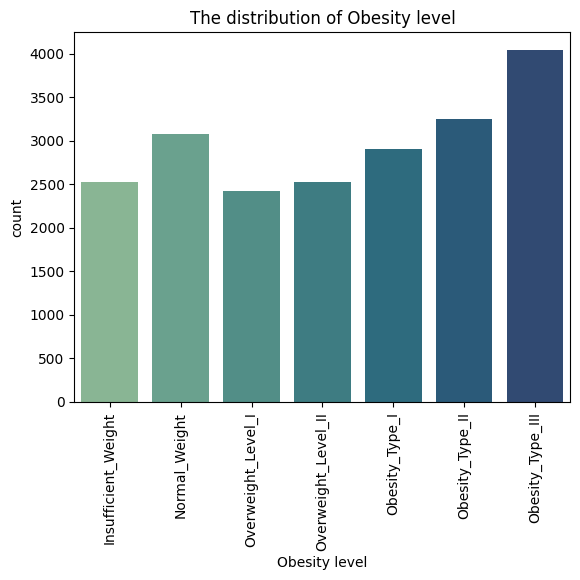

In [16]:
# Create a bar chart to see how many examples we have of each types

# Sort the order of 'Obesity_level' column 
order = ['Insufficient_Weight', 
         'Normal_Weight', 
         'Overweight_Level_I', 
         'Overweight_Level_II', 
         'Obesity_Type_I', 
         'Obesity_Type_II', 
         'Obesity_Type_III']

sns.countplot(data = all_data, 
              x = 'Obesity_level', 
              order = order,
              palette = 'crest')

# Add some text for label, title 
plt.xlabel('Obesity level')
plt.xticks(rotation=90)
plt.title('The distribution of Obesity level')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Vege_food'}>,
        <Axes: title={'center': 'Main_meal'}>,
        <Axes: title={'center': 'Water_consumption'}>],
       [<Axes: title={'center': 'Physical_activity_frequency'}>,
        <Axes: title={'center': 'Time_using_electronic'}>, <Axes: >]],
      dtype=object)

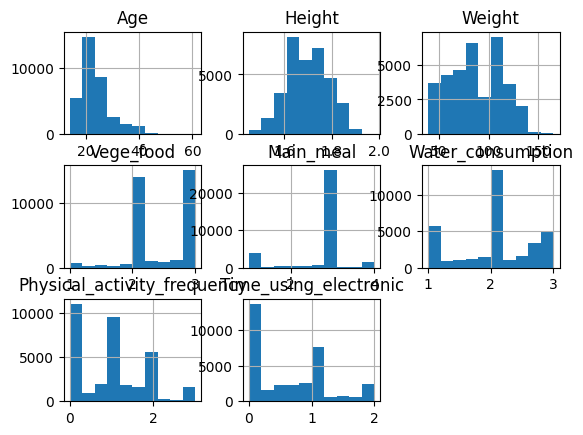

In [17]:
# Create histogram to see univariate distributions of each feature 

all_data.hist()

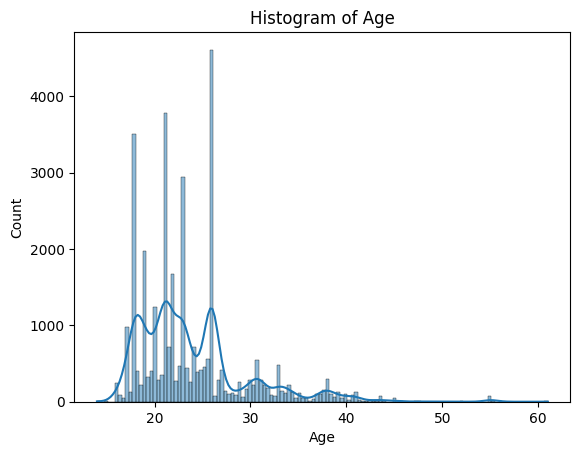

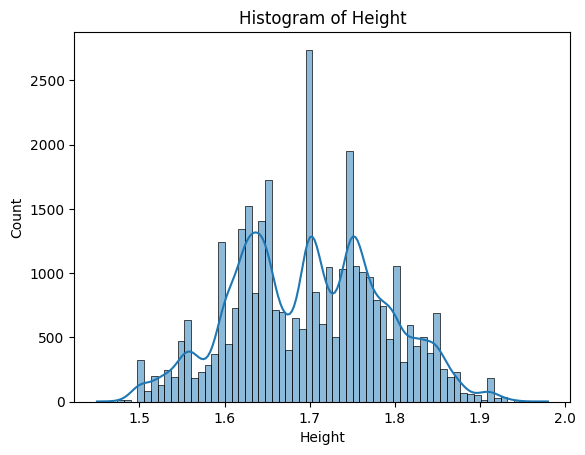

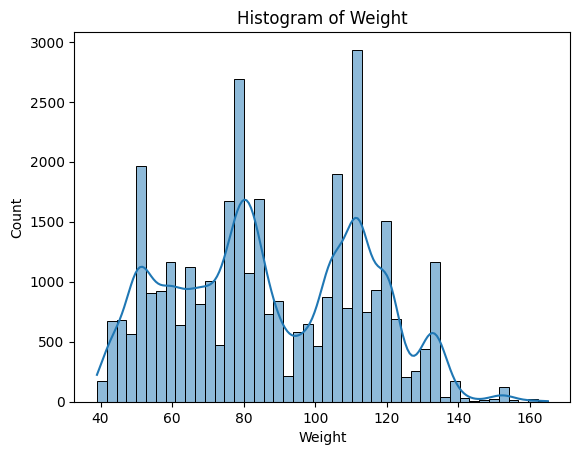

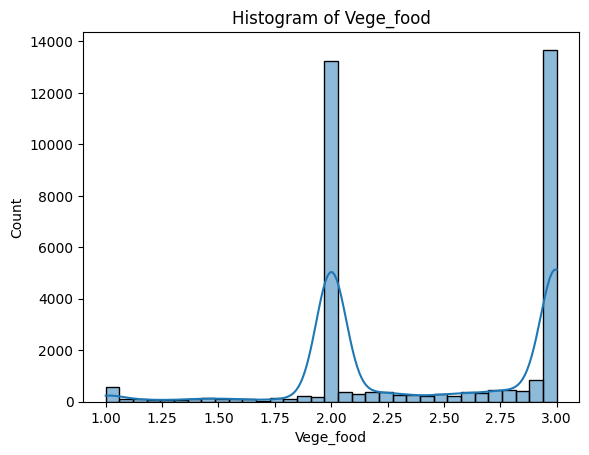

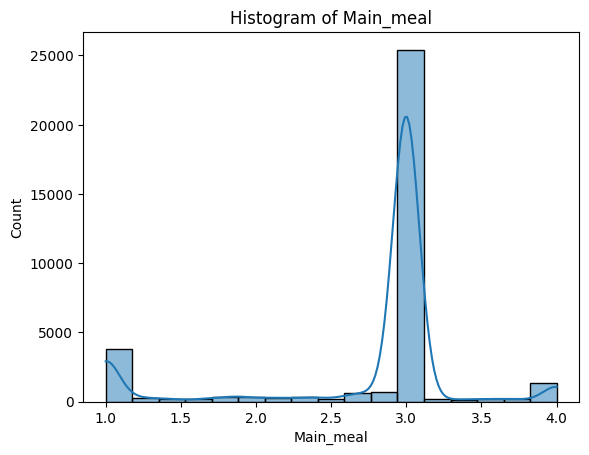

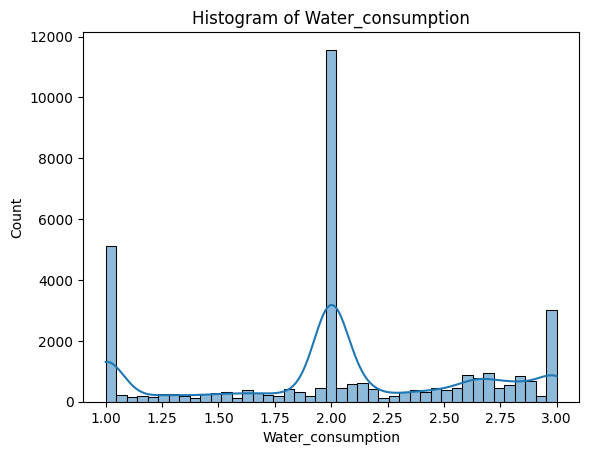

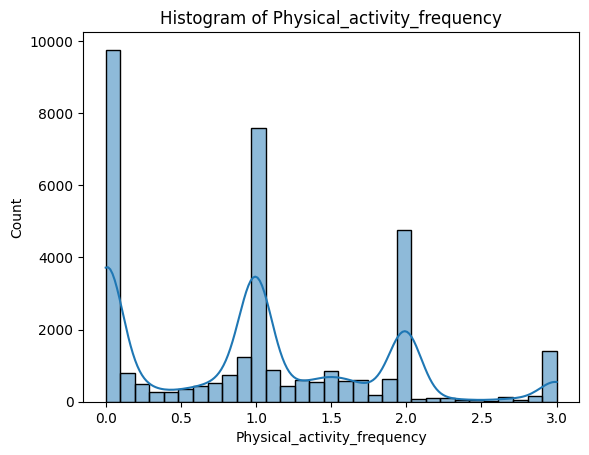

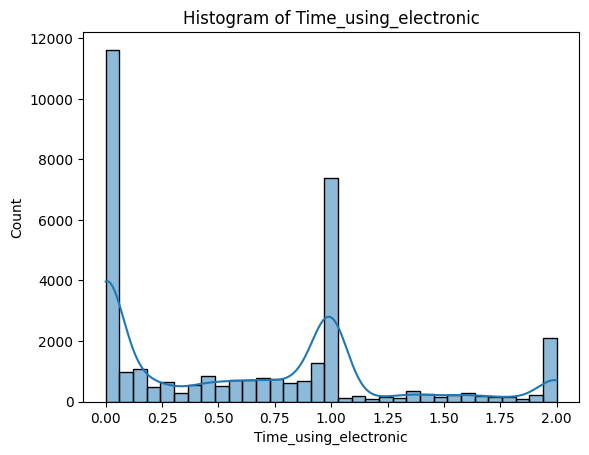

In [18]:
# Create histogram and kde to see univariate distributions of each feature 

features = all_data.select_dtypes('number')

for feature in features:
    sns.histplot(data=all_data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

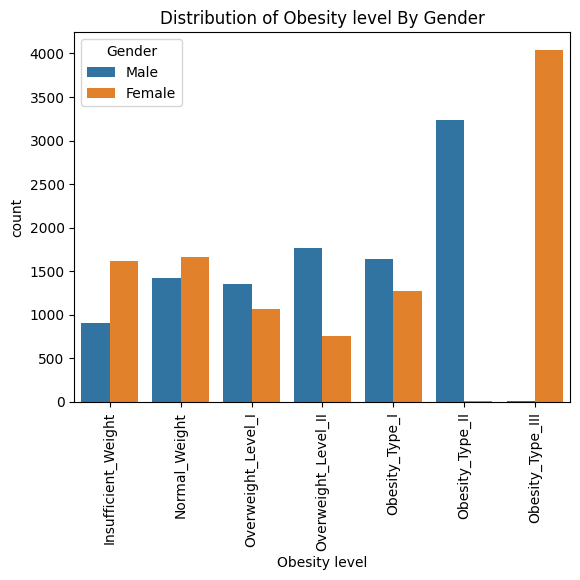

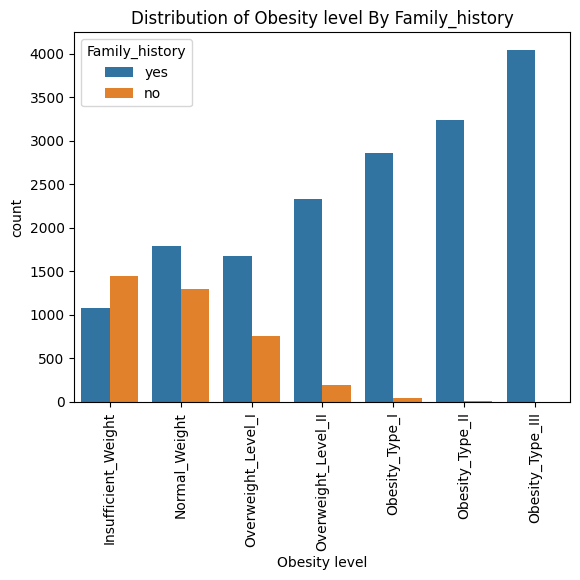

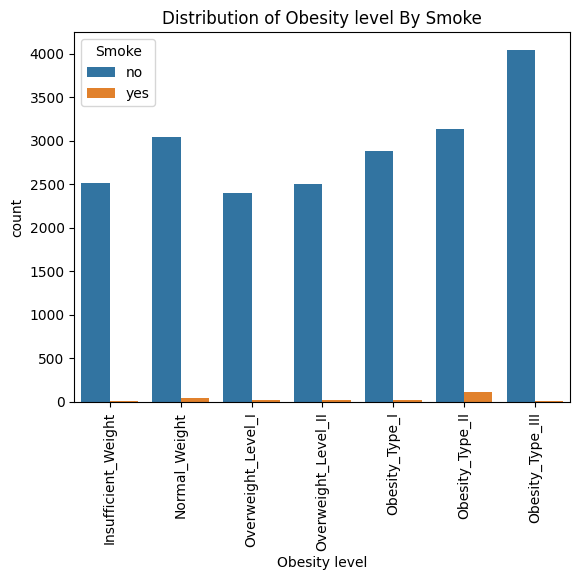

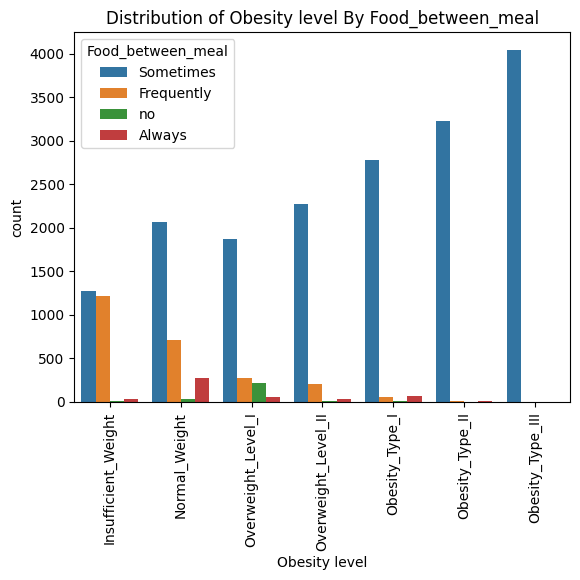

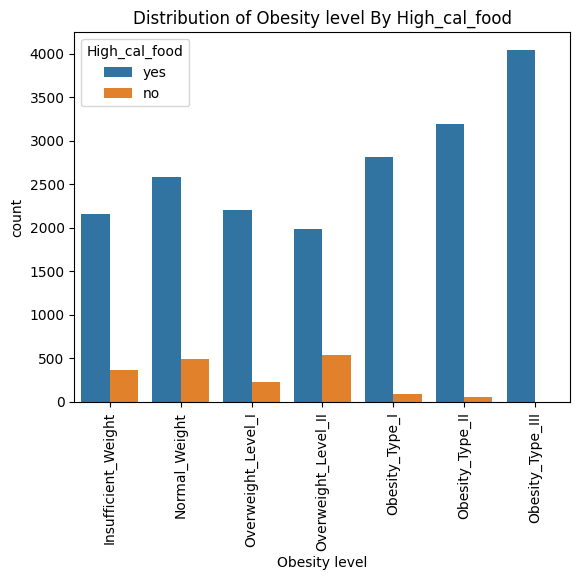

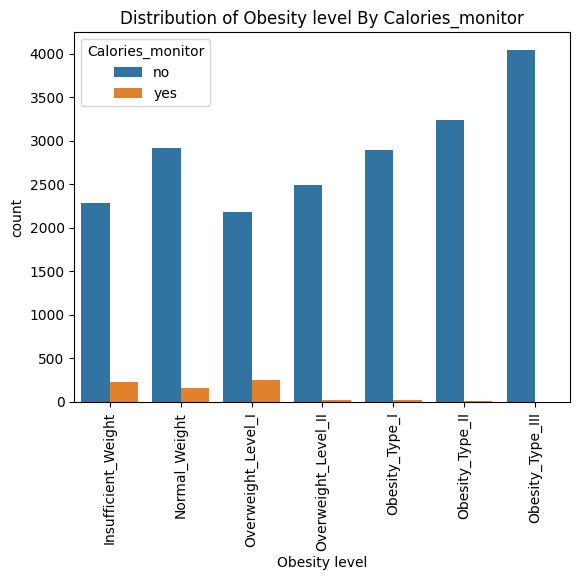

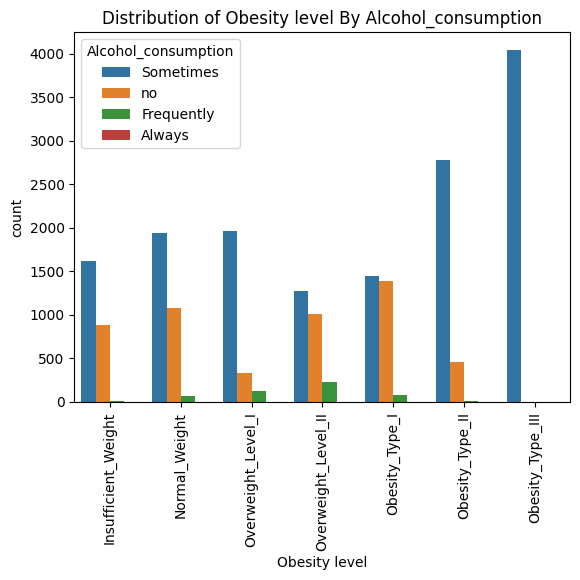

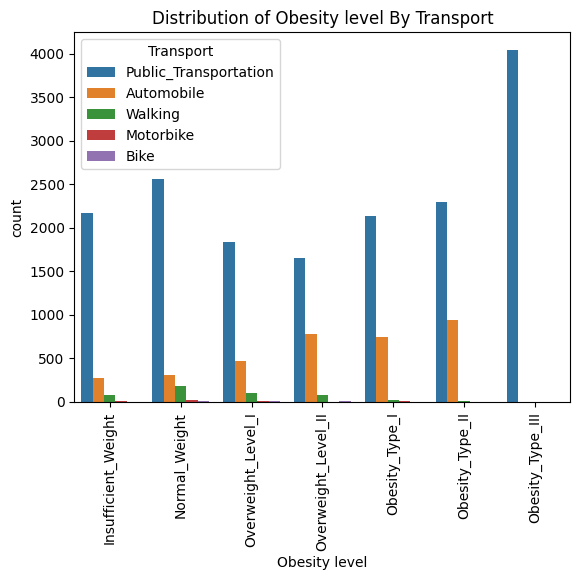

In [19]:
# Create bar chart to see the distributions of Obesity level in 'Categoric features' 

categoric_features = ['Gender','Family_history','Smoke','Food_between_meal','High_cal_food','Calories_monitor','Alcohol_consumption','Transport']

for feature in categoric_features:
    sns.countplot(data=all_data, x='Obesity_level',order=order, hue=feature)
    
    # Add some text for labels, title 
    plt.xticks(rotation=90)
    plt.xlabel('Obesity level')
    plt.title(f'Distribution of Obesity level By {feature}')
    plt.show()

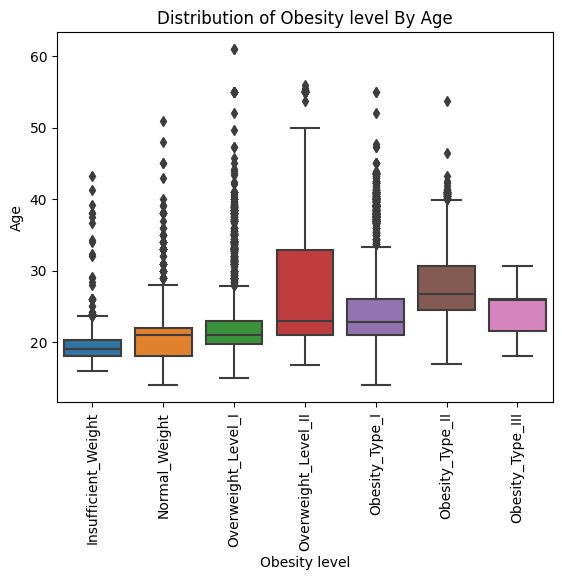

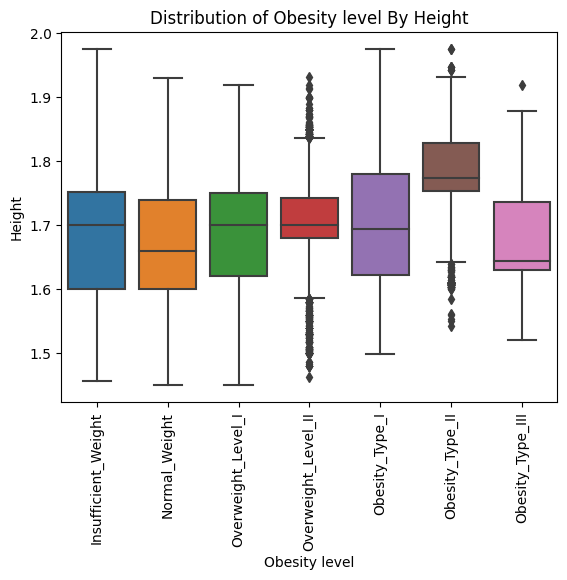

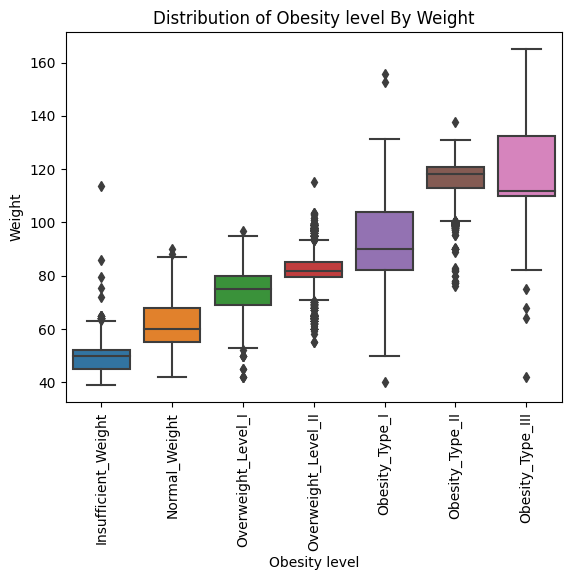

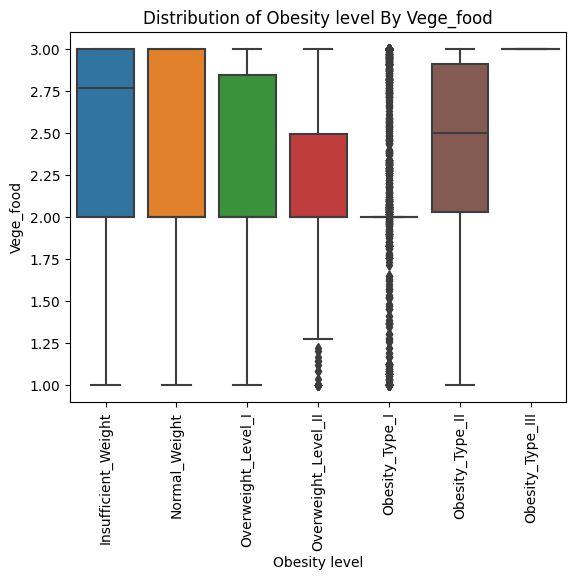

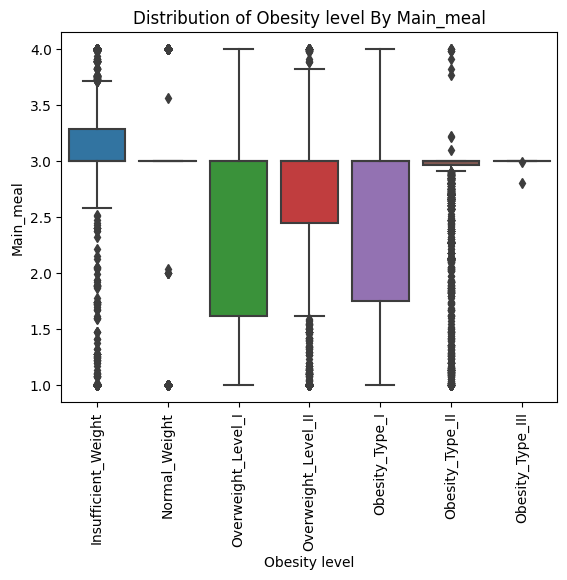

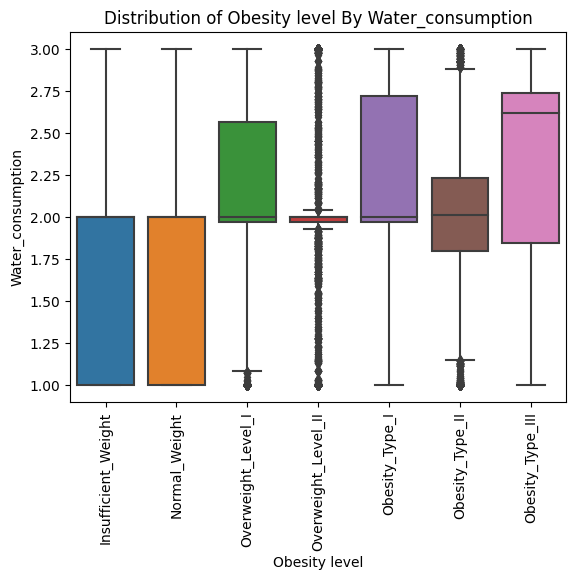

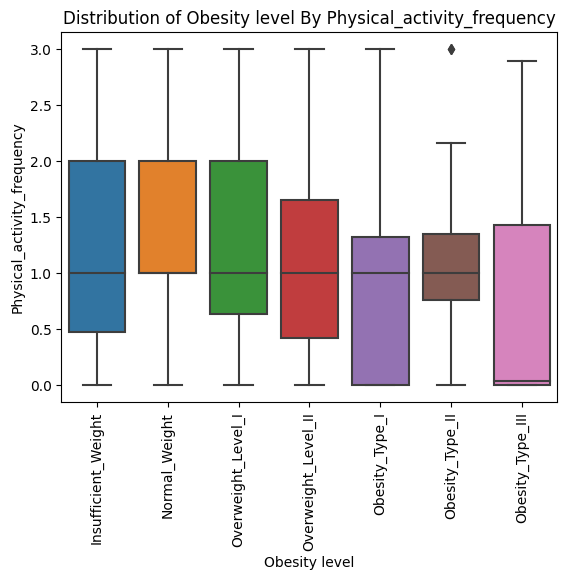

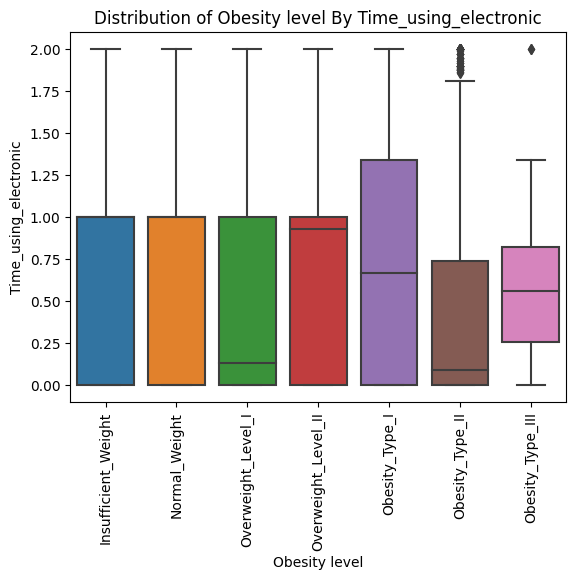

In [20]:
# Create box plot to see the distributions of Obesity level in 'Numeric features' 

numeric_features = all_data.select_dtypes('number')

for feature in numeric_features:
    sns.boxplot(data=all_data, x='Obesity_level',y=feature, order=order)
    
    # Add some text for labels, title 
    plt.xticks(rotation=90)
    plt.xlabel('Obesity level')
    plt.title(f'Distribution of Obesity level By {feature}')
    plt.show()
    
# Note : also can change to violin plot by this code
# sns.violinplot(data=all_data, x='Obesity_level',y=feature, order=order)

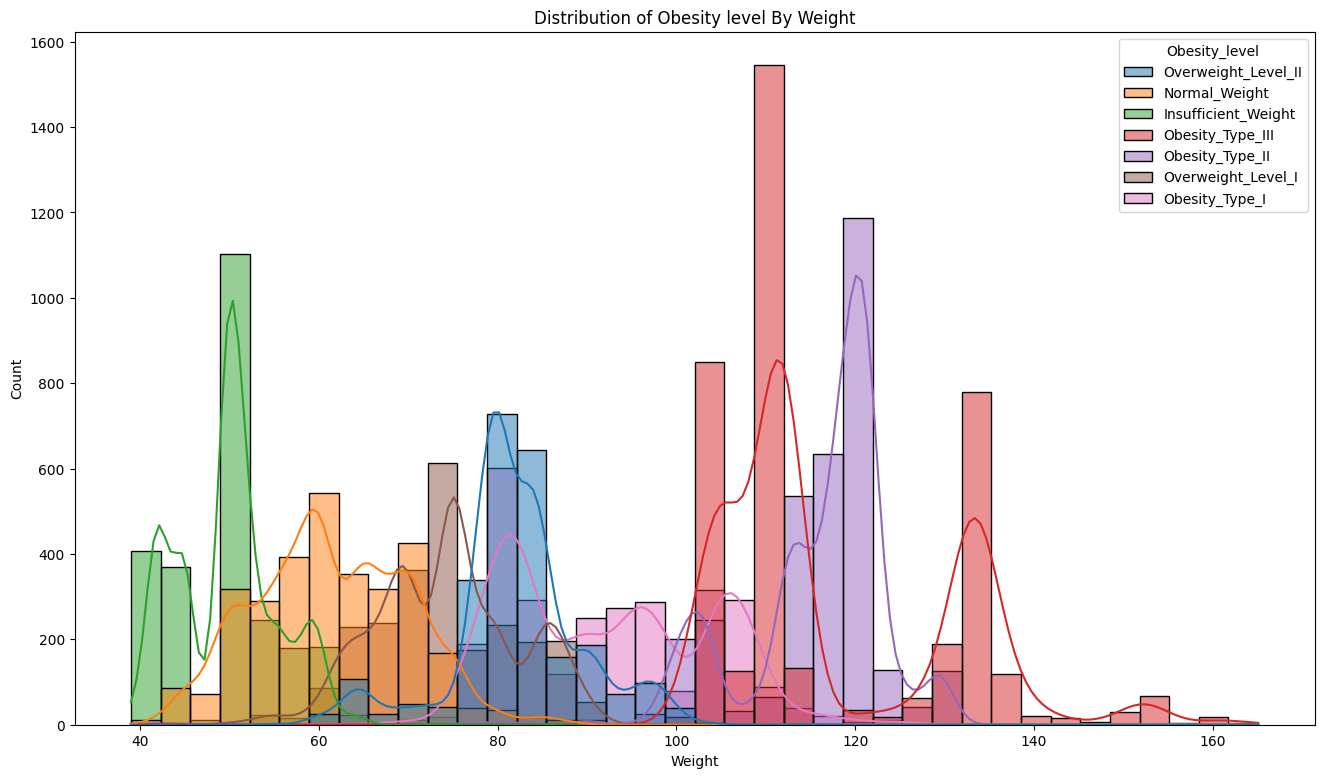

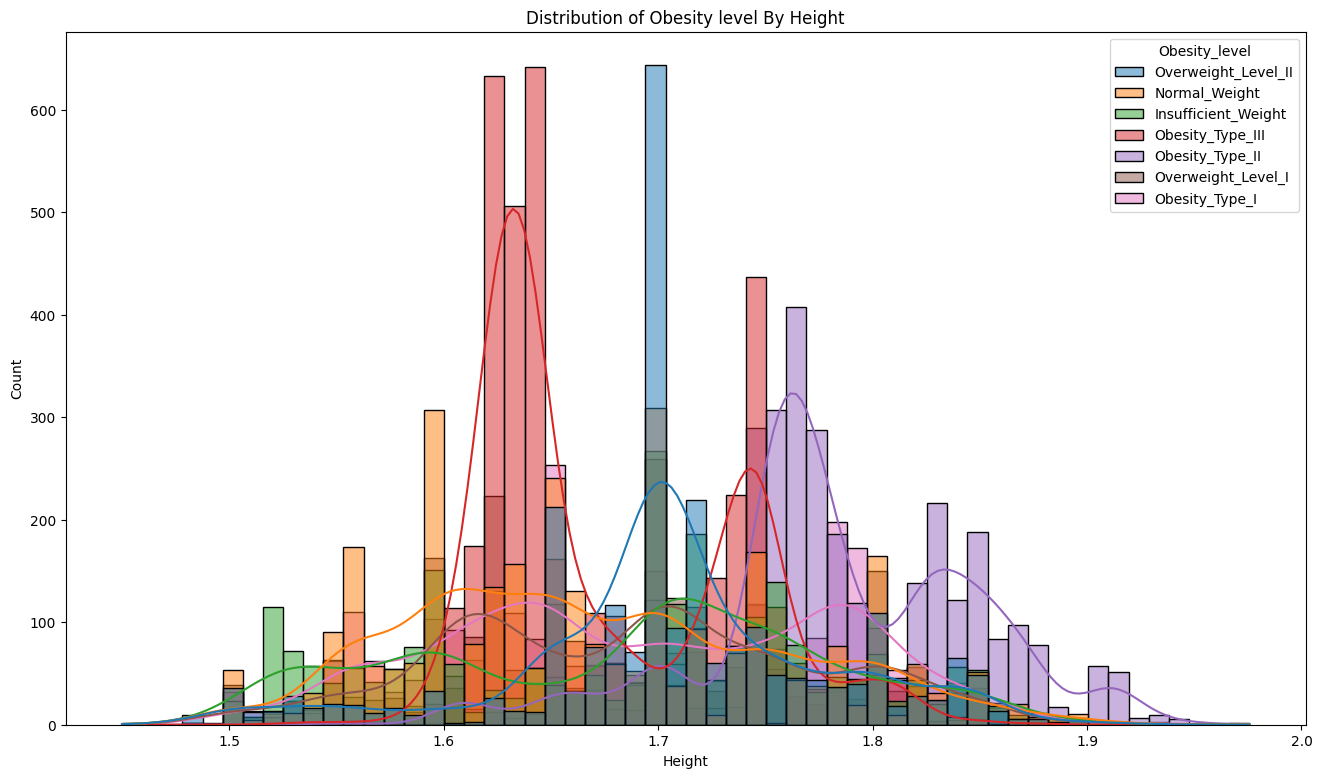

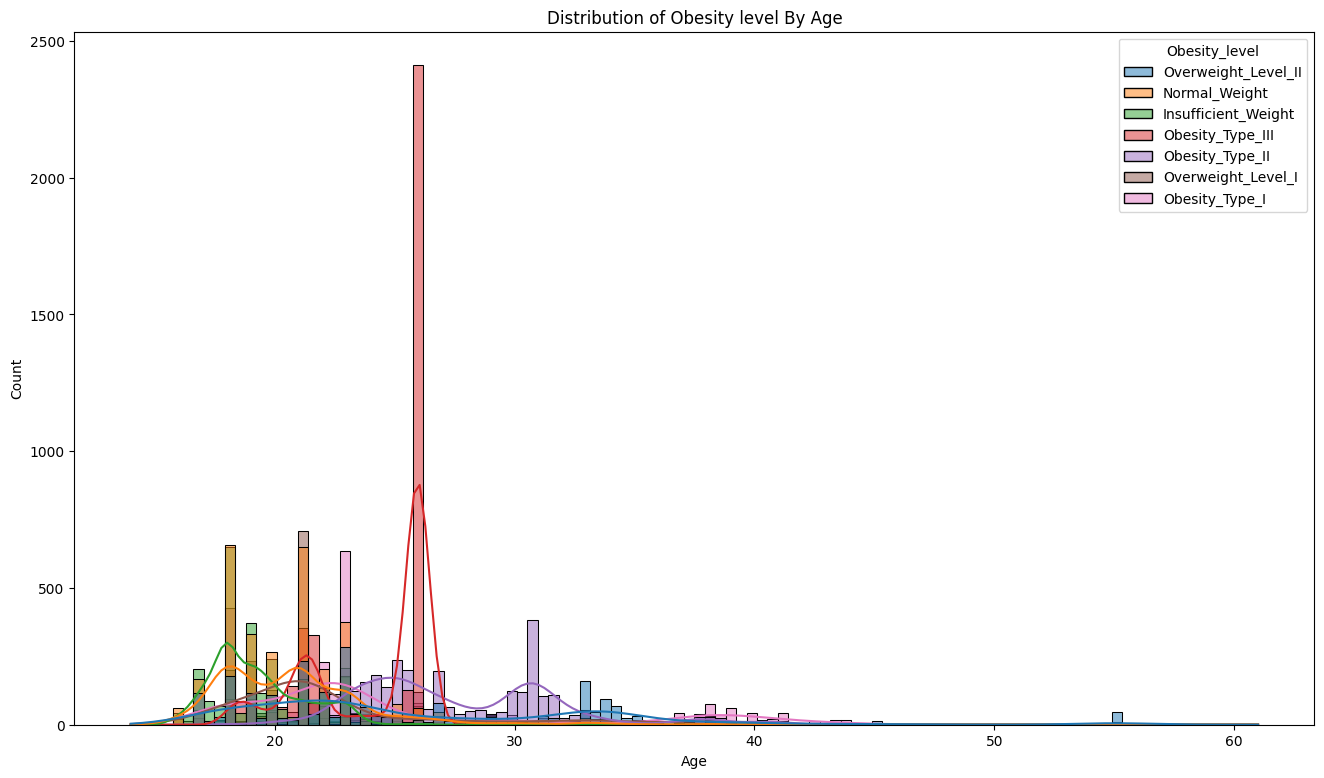

In [21]:
# Create histogram and kde to see the distributions of 'Age','Weight','Height' features

features = ['Weight','Height','Age']

for feature in features:
    plt.figure(figsize=(16,9))
    sns.histplot(data=all_data, x=feature,hue='Obesity_level', kde=True)
    plt.title(f'Distribution of Obesity level By {feature}')
    plt.show()

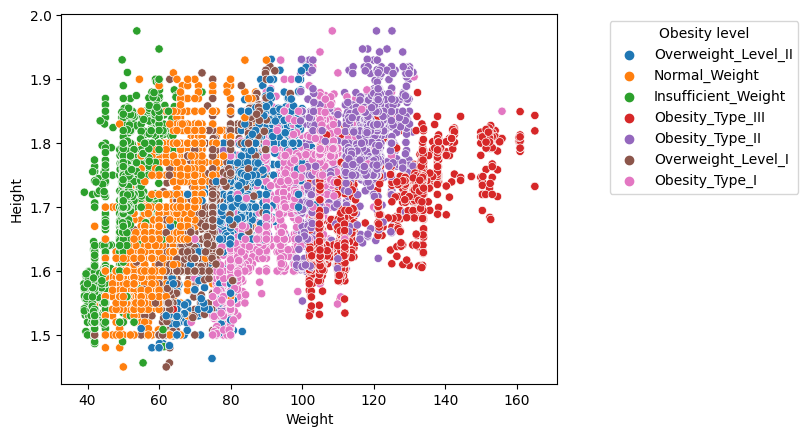

In [22]:
# Create a scatterplot of the 'Obesity_level' feature

sns.scatterplot(data=all_data, x='Weight', y='Height', hue='Obesity_level')

plt.legend(title='Obesity level',loc='upper right', bbox_to_anchor=(1.5, 1))


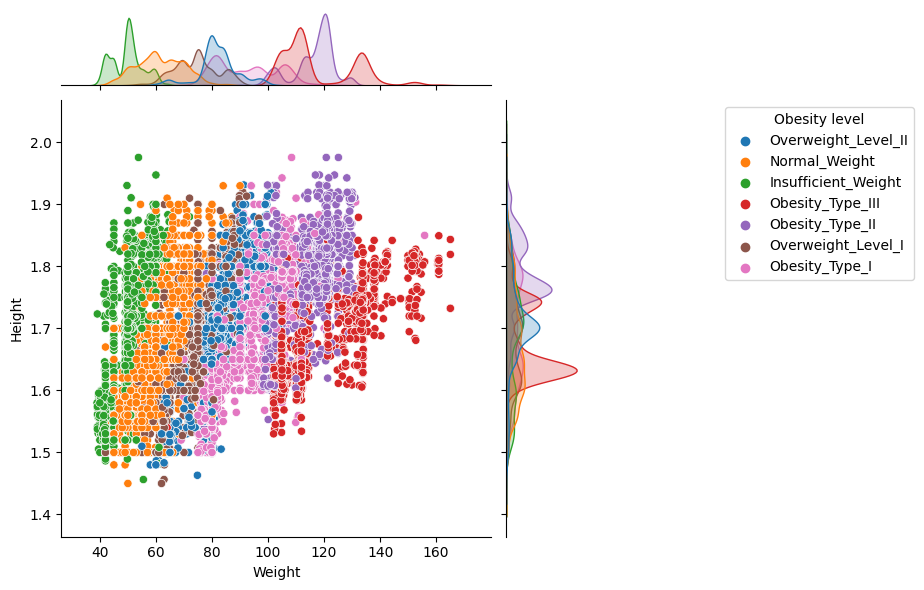

In [23]:
# Try to use the seaborn's jointplot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x='Weight', y='Height', hue='Obesity_level', data=all_data)

plt.legend(title='Obesity level',loc='upper right', bbox_to_anchor=(2, 1))

In [24]:
# Create 3D Scatter Plots

fig = px.scatter_3d(all_data, x='Obesity_level', y='Height', z='Weight', color='Obesity_level', opacity=0.75)

fig.update_layout(title='3D Scatter plot Matrix: Weight vs Height vs Obesity level',
                     width=1000, height=1000,
                     paper_bgcolor='rgb(243,243,243)',
                     plot_bgcolor='rgb(243,243,243)')
fig.show()

In [25]:
# Create 3D Scatter Plots

fig = px.scatter_3d(all_data, x='Obesity_level',y='Weight', z='Age', color='Obesity_level', opacity=0.75)

fig.update_layout(title='3D Scatter plot Matrix: Weight vs Age vs Obesity level',
                     width=1000, height=1000,
                     paper_bgcolor='rgb(243,243,243)',
                     plot_bgcolor='rgb(243,243,243)')
fig.show()

# Feature engineering

In [26]:
# Create 'BMI' feature

all_data['BMI'] = all_data['Weight'] / (all_data['Height'] ** 2)

all_data.head()

Gender        Age    Height      Weight Family_history High_cal_food  \
0    Male  24.443011  1.699998   81.669950            yes           yes   
1  Female  18.000000  1.560000   57.000000            yes           yes   
2  Female  18.000000  1.711460   50.165754            yes           yes   
3  Female  20.952737  1.710730  131.274851            yes           yes   
4    Male  31.641081  1.914186   93.798055            yes           yes   

   Vege_food  Main_meal Food_between_meal Smoke  Water_consumption  \
0   2.000000   2.983297         Sometimes    no           2.763573   
1   2.000000   3.000000        Frequently    no           2.000000   
2   1.880534   1.411685         Sometimes    no           1.910378   
3   3.000000   3.000000         Sometimes    no           1.674061   
4   2.679664   1.971472         Sometimes    no           1.979848   

  Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
0               no                     0.000000               0.976473   
1               no                     1.000000               1.000000   
2               no                     0.866045               1.673584   
3               no                     1.467863               0.780199   
4               no                     1.967973               0.931721   

  Alcohol_consumption              Transport        Obesity_level        BMI  
0           Sometimes  Public_Transportation  Overweight_Level_II  28.259565  
1                  no             Automobile        Normal_Weight  23.422091  
2                  no  Public_Transportation  Insufficient_Weight  17.126706  
3           Sometimes  Public_Transportation     Obesity_Type_III  44.855798  
4           Sometimes  Public_Transportation  Overweight_Level_II  25.599151

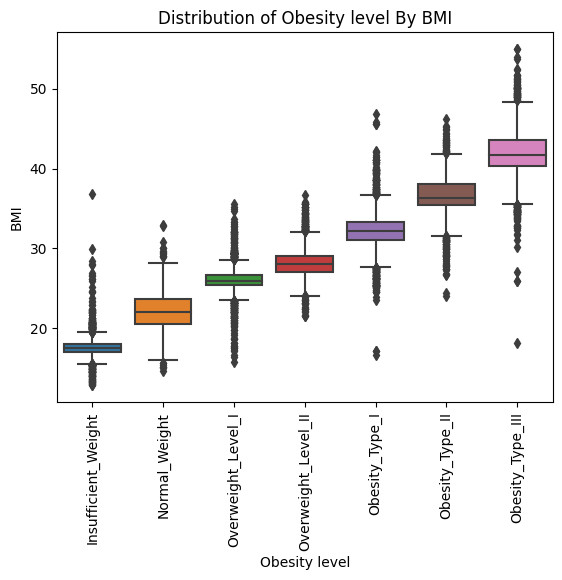

In [27]:
# Create box plot to see the distributions of Obesity level By BMI

sns.boxplot(data=all_data, x='Obesity_level',y='BMI', order=order)

plt.xticks(rotation=90)
plt.xlabel('Obesity level')
plt.title('Distribution of Obesity level By BMI')
plt.show()

Text(0.5, 1.0, 'Distribution of BMI by Obesity level')

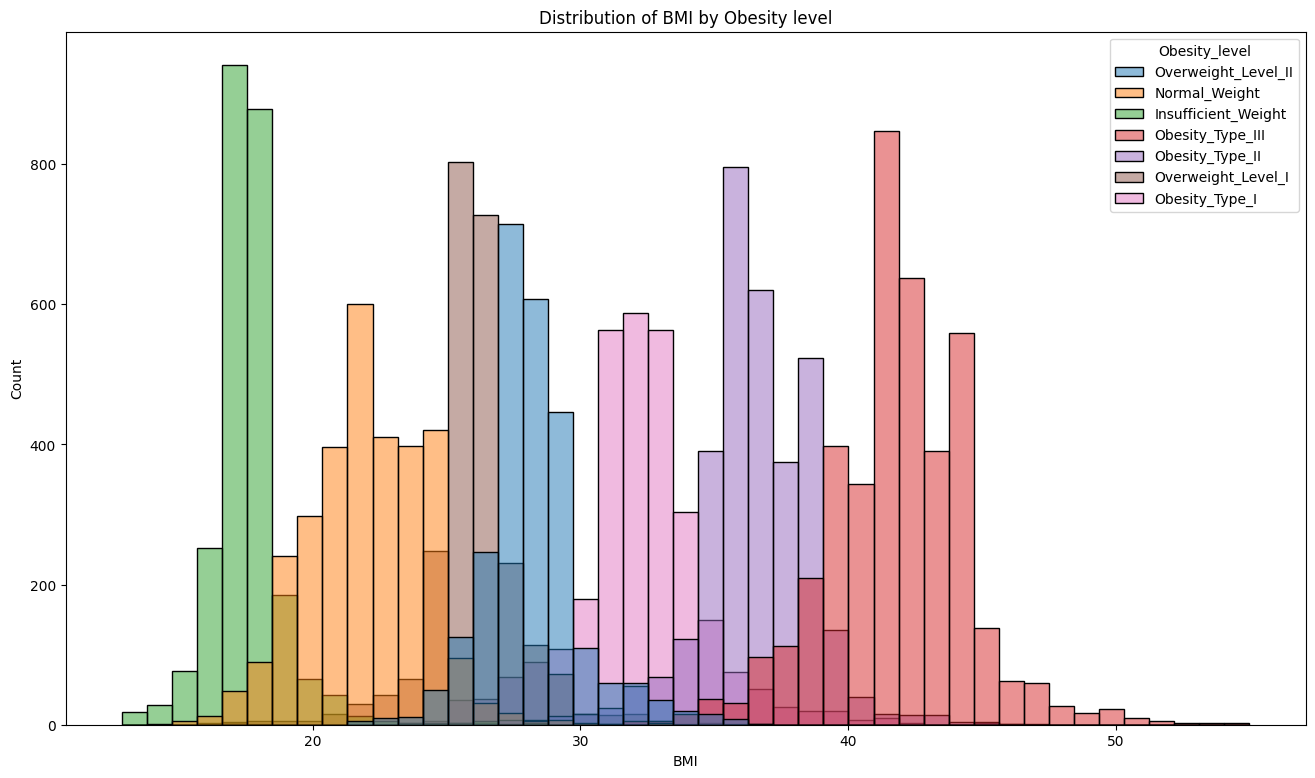

In [28]:
# Create histogram to see the distributions of Obesity level By BMI

plt.figure(figsize=(16,9))

sns.histplot(data=all_data,x='BMI', hue='Obesity_level')

plt.title('Distribution of BMI by Obesity level')

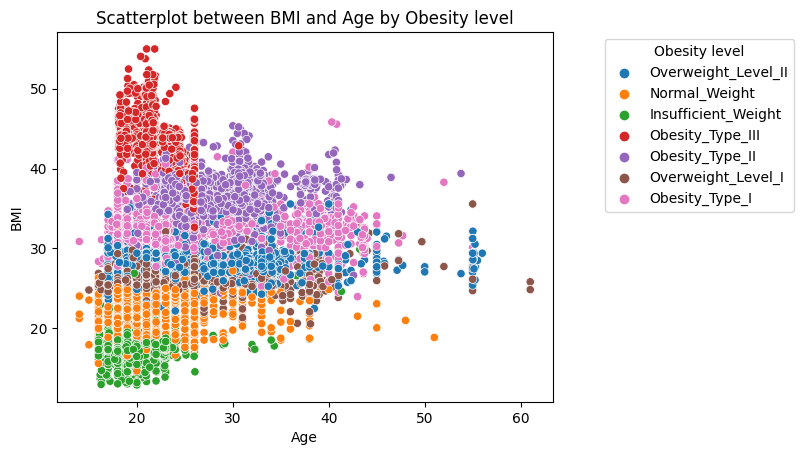

In [29]:
# Create a scatterplot 

sns.scatterplot(data=all_data, y='BMI', x='Age', hue='Obesity_level')

plt.title('Scatterplot between BMI and Age by Obesity level')
plt.legend(title='Obesity level',loc='upper right', bbox_to_anchor=(1.5, 1))

# Data Preprocess for model

In [30]:
all_data.head()

Gender        Age    Height      Weight Family_history High_cal_food  \
0    Male  24.443011  1.699998   81.669950            yes           yes   
1  Female  18.000000  1.560000   57.000000            yes           yes   
2  Female  18.000000  1.711460   50.165754            yes           yes   
3  Female  20.952737  1.710730  131.274851            yes           yes   
4    Male  31.641081  1.914186   93.798055            yes           yes   

   Vege_food  Main_meal Food_between_meal Smoke  Water_consumption  \
0   2.000000   2.983297         Sometimes    no           2.763573   
1   2.000000   3.000000        Frequently    no           2.000000   
2   1.880534   1.411685         Sometimes    no           1.910378   
3   3.000000   3.000000         Sometimes    no           1.674061   
4   2.679664   1.971472         Sometimes    no           1.979848   

  Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
0               no                     0.000000               0.976473   
1               no                     1.000000               1.000000   
2               no                     0.866045               1.673584   
3               no                     1.467863               0.780199   
4               no                     1.967973               0.931721   

  Alcohol_consumption              Transport        Obesity_level        BMI  
0           Sometimes  Public_Transportation  Overweight_Level_II  28.259565  
1                  no             Automobile        Normal_Weight  23.422091  
2                  no  Public_Transportation  Insufficient_Weight  17.126706  
3           Sometimes  Public_Transportation     Obesity_Type_III  44.855798  
4           Sometimes  Public_Transportation  Overweight_Level_II  25.599151

In [31]:
# Change the label of the target and make sure we can convert them back for submission

map_target = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6,
             }

all_data['Obesity_level'] = all_data['Obesity_level'].map(map_target)

all_data.head()

Gender        Age    Height      Weight Family_history High_cal_food  \
0    Male  24.443011  1.699998   81.669950            yes           yes   
1  Female  18.000000  1.560000   57.000000            yes           yes   
2  Female  18.000000  1.711460   50.165754            yes           yes   
3  Female  20.952737  1.710730  131.274851            yes           yes   
4    Male  31.641081  1.914186   93.798055            yes           yes   

   Vege_food  Main_meal Food_between_meal Smoke  Water_consumption  \
0   2.000000   2.983297         Sometimes    no           2.763573   
1   2.000000   3.000000        Frequently    no           2.000000   
2   1.880534   1.411685         Sometimes    no           1.910378   
3   3.000000   3.000000         Sometimes    no           1.674061   
4   2.679664   1.971472         Sometimes    no           1.979848   

  Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
0               no                     0.000000               0.976473   
1               no                     1.000000               1.000000   
2               no                     0.866045               1.673584   
3               no                     1.467863               0.780199   
4               no                     1.967973               0.931721   

  Alcohol_consumption              Transport  Obesity_level        BMI  
0           Sometimes  Public_Transportation            3.0  28.259565  
1                  no             Automobile            1.0  23.422091  
2                  no  Public_Transportation            0.0  17.126706  
3           Sometimes  Public_Transportation            6.0  44.855798  
4           Sometimes  Public_Transportation            3.0  25.599151

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34598 entries, 0 to 13839
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       34598 non-null  object 
 1   Age                          34598 non-null  float64
 2   Height                       34598 non-null  float64
 3   Weight                       34598 non-null  float64
 4   Family_history               34598 non-null  object 
 5   High_cal_food                34598 non-null  object 
 6   Vege_food                    34598 non-null  float64
 7   Main_meal                    34598 non-null  float64
 8   Food_between_meal            34598 non-null  object 
 9   Smoke                        34598 non-null  object 
 10  Water_consumption            34598 non-null  float64
 11  Calories_monitor             34598 non-null  object 
 12  Physical_activity_frequency  34598 non-null  float64
 13  Time_using_electronic

In [33]:
# Change the label of categoric features

encoder = LabelEncoder()

columns_to_encode = ['Gender', 'Family_history', 'High_cal_food', 'Food_between_meal', 'Smoke', 'Calories_monitor', 'Alcohol_consumption', 'Transport']

for column in columns_to_encode:
    all_data[column] = encoder.fit_transform(all_data[column])

all_data.head()

Gender        Age    Height      Weight  Family_history  High_cal_food  \
0       1  24.443011  1.699998   81.669950               1              1   
1       0  18.000000  1.560000   57.000000               1              1   
2       0  18.000000  1.711460   50.165754               1              1   
3       0  20.952737  1.710730  131.274851               1              1   
4       1  31.641081  1.914186   93.798055               1              1   

   Vege_food  Main_meal  Food_between_meal  Smoke  Water_consumption  \
0   2.000000   2.983297                  2      0           2.763573   
1   2.000000   3.000000                  1      0           2.000000   
2   1.880534   1.411685                  2      0           1.910378   
3   3.000000   3.000000                  2      0           1.674061   
4   2.679664   1.971472                  2      0           1.979848   

   Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
0                 0                     0.000000               0.976473   
1                 0                     1.000000               1.000000   
2                 0                     0.866045               1.673584   
3                 0                     1.467863               0.780199   
4                 0                     1.967973               0.931721   

   Alcohol_consumption  Transport  Obesity_level        BMI  
0                    2          3            3.0  28.259565  
1                    3          0            1.0  23.422091  
2                    3          3            0.0  17.126706  
3                    2          3            6.0  44.855798  
4                    2          3            3.0  25.599151

<Axes: >

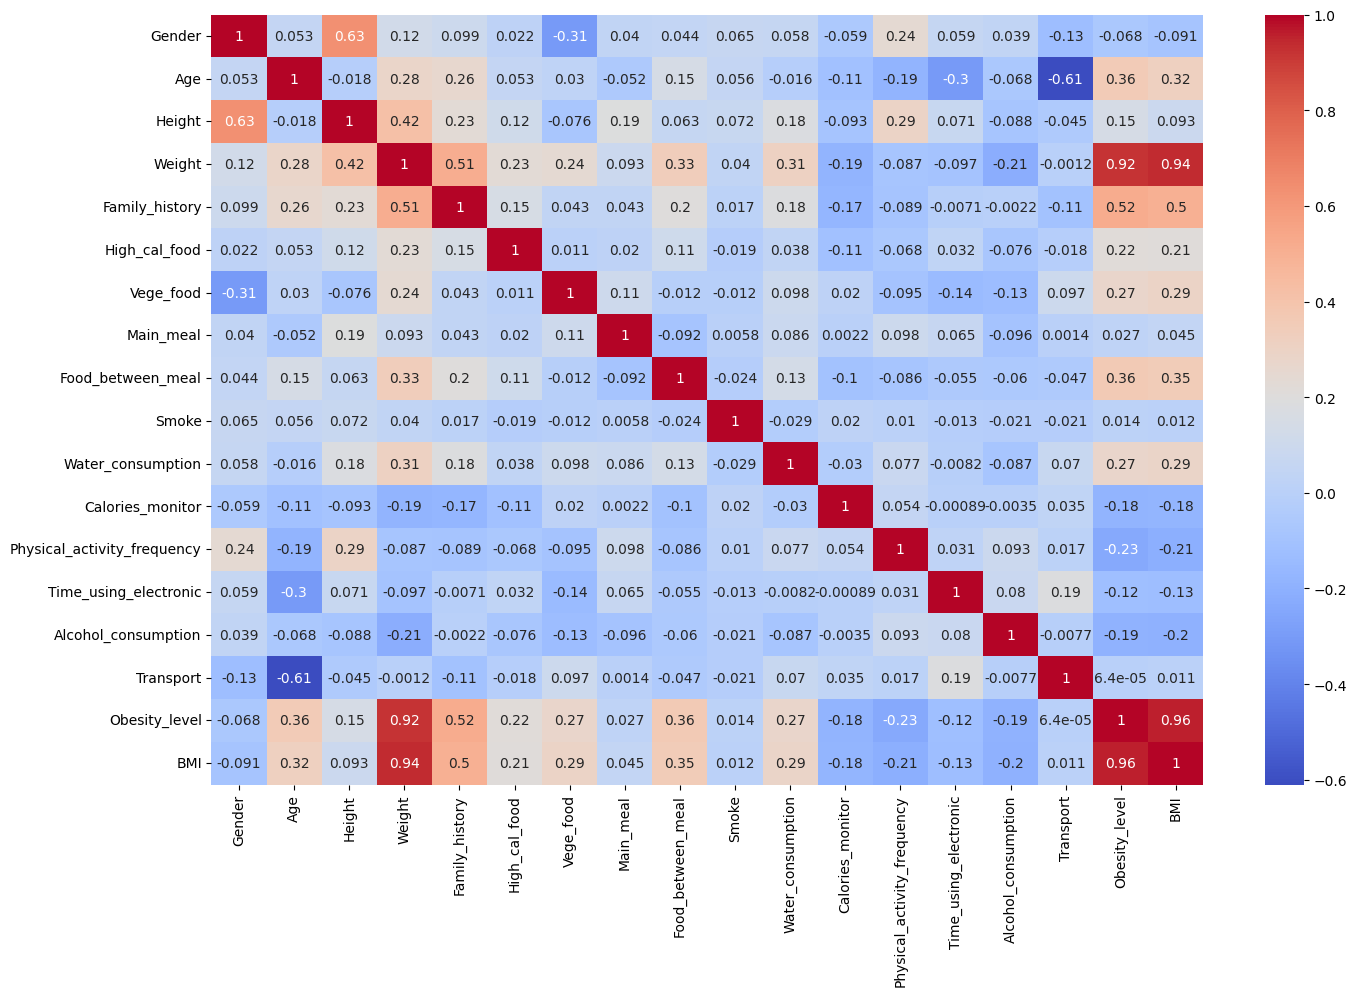

In [34]:
# Correlation between variables

plt.figure(figsize=(16,10))

sns.heatmap(all_data.corr(),annot = True,cmap = "coolwarm")

<Axes: >

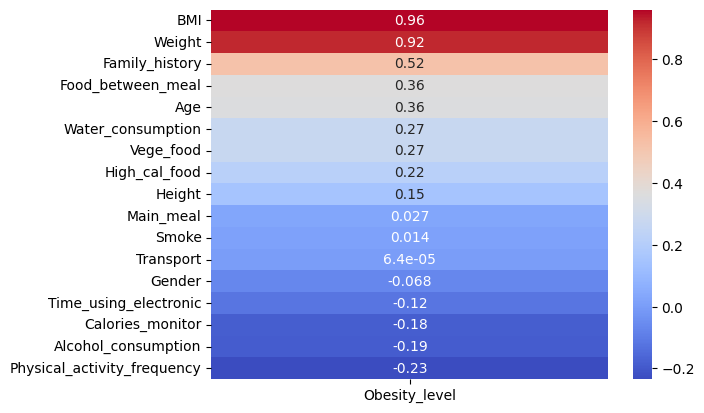

In [35]:
# The correlation to Obesity level (Target)

target_cor = all_data.corr()['Obesity_level'].drop(['Obesity_level']).sort_values(ascending=False).to_frame()

sns.heatmap(target_cor,cmap="coolwarm", annot=True)

In [36]:
# Reform splits to train, test dataset

df_train = all_data[:len(train)]
df_test = all_data[len(train):]

df_test.drop('Obesity_level', axis=1, inplace=True)

In [37]:
df_train.head()

Gender        Age    Height      Weight  Family_history  High_cal_food  \
0       1  24.443011  1.699998   81.669950               1              1   
1       0  18.000000  1.560000   57.000000               1              1   
2       0  18.000000  1.711460   50.165754               1              1   
3       0  20.952737  1.710730  131.274851               1              1   
4       1  31.641081  1.914186   93.798055               1              1   

   Vege_food  Main_meal  Food_between_meal  Smoke  Water_consumption  \
0   2.000000   2.983297                  2      0           2.763573   
1   2.000000   3.000000                  1      0           2.000000   
2   1.880534   1.411685                  2      0           1.910378   
3   3.000000   3.000000                  2      0           1.674061   
4   2.679664   1.971472                  2      0           1.979848   

   Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
0                 0                     0.000000               0.976473   
1                 0                     1.000000               1.000000   
2                 0                     0.866045               1.673584   
3                 0                     1.467863               0.780199   
4                 0                     1.967973               0.931721   

   Alcohol_consumption  Transport  Obesity_level        BMI  
0                    2          3            3.0  28.259565  
1                    3          0            1.0  23.422091  
2                    3          3            0.0  17.126706  
3                    2          3            6.0  44.855798  
4                    2          3            3.0  25.599151

In [38]:
# Define the features and target

X = df_train.drop('Obesity_level', axis=1)

y = df_train['Obesity_level']

In [39]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, random_state = 0)


In [40]:
X_train.head()

Gender        Age    Height      Weight  Family_history  High_cal_food  \
7320        0  21.037514  1.742901  132.940660               1              1   
11946       0  26.000000  1.650000   63.000000               1              0   
5370        1  22.720449  1.650000   98.790167               1              1   
1179        0  21.412434  1.748524  133.365094               1              1   
10598       1  18.000000  1.780000  108.000000               1              1   

       Vege_food  Main_meal  Food_between_meal  Smoke  Water_consumption  \
7320         3.0   3.000000                  2      0           1.827515   
11946        3.0   3.000000                  2      0           2.000000   
5370         2.0   2.675411                  2      0           2.094479   
1179         3.0   3.000000                  2      0           1.716590   
10598        2.0   3.000000                  2      0           1.000000   

       Calories_monitor  Physical_activity_frequency  Time_using_electronic  \
7320                  0                     1.583832               0.582840   
11946                 0                     0.000000               2.000000   
5370                  0                     0.000000               1.355370   
1179                  0                     1.465931               0.711724   
10598                 0                     1.000000               1.000000   

       Alcohol_consumption  Transport        BMI  
7320                     2          3  43.763535  
11946                    3          0  23.140496  
5370                     3          3  36.286563  
1179                     2          3  43.621338  
10598                    3          3  34.086605

# Create Models

**List of algorithms**

Since it is a classification problem I will be using

* Decision tree
* Random forest
* K-nearest Neighbors
* Naive Bayes Classifier
* Light Gradient Boosting Machine
* eXtream Gradient Boosting

In [41]:
# Decision tree

dt_model = DecisionTreeClassifier(max_depth=7)
dt_model.fit(X_train,y_train)

dt_predict = dt_model.predict(X_valid)

dt_score = accuracy_score(dt_predict,y_valid)

print(classification_report(y_valid,dt_predict))
print(confusion_matrix(y_valid,dt_predict))
print('The accuracy of Decision tree is',dt_score)

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       478
         1.0       0.85      0.84      0.84       630
         2.0       0.69      0.72      0.71       472
         3.0       0.72      0.72      0.72       510
         4.0       0.80      0.82      0.81       582
         5.0       0.98      0.91      0.94       673
         6.0       0.99      0.99      0.99       807

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152

[[442  32   4   0   0   0   0]
 [ 43 529  54   2   2   0   0]
 [  2  56 342  66   5   0   1]
 [  0   8  79 367  54   1   1]
 [  1   0  16  69 480  14   2]
 [  0   0   2   6  50 614   1]
 [  0   0   0   0   6   0 801]]
The accuracy of Decision tree is 0.8610308285163777


Text(0.5, 1.0, 'Feature Importances from Decision Tree model')

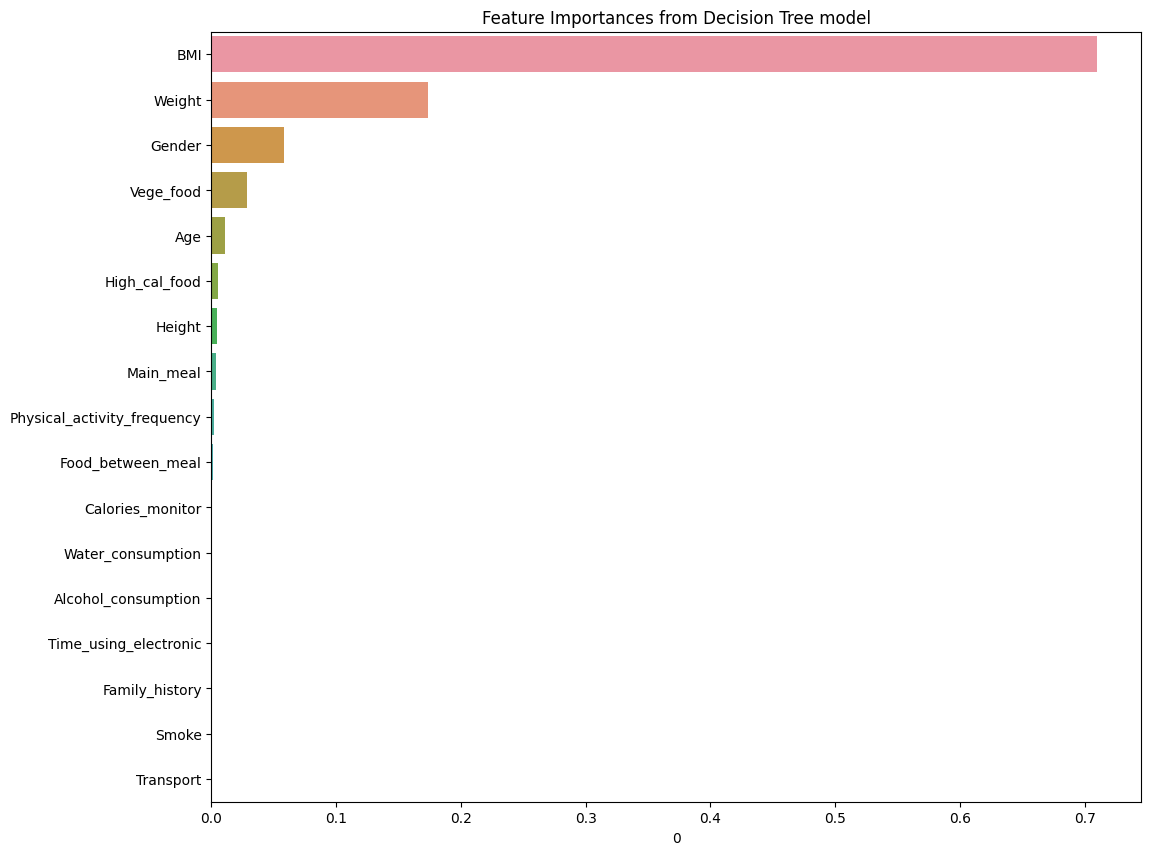

In [42]:
# Feature Importances

importances = pd.DataFrame(dt_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from Decision Tree model')

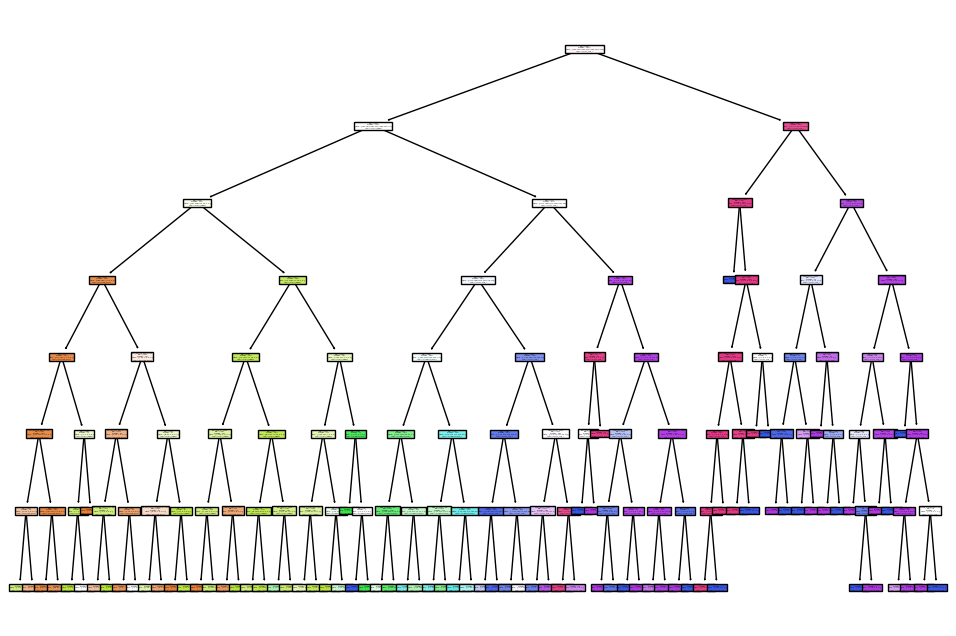

In [43]:
# Create Decision Tree Visualization

from sklearn import tree

feature_names = X_train.columns
target_names = order

fig = plt.figure(figsize=(12,8))

plot = tree.plot_tree(
    dt_model,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)

plt.show()

In [44]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

rf_predict = rf_model.predict(X_valid)

rf_score = accuracy_score(rf_predict,y_valid)
print(classification_report(y_valid,rf_predict))
print(confusion_matrix(y_valid,rf_predict))
print('The accuracy of Random Forest is',rf_score)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       478
         1.0       0.87      0.87      0.87       630
         2.0       0.78      0.76      0.77       472
         3.0       0.77      0.84      0.80       510
         4.0       0.89      0.85      0.87       582
         5.0       0.97      0.96      0.96       673
         6.0       1.00      1.00      1.00       807

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

[[445  29   4   0   0   0   0]
 [ 35 547  44   3   1   0   0]
 [  2  47 357  60   6   0   0]
 [  0   7  42 426  31   4   0]
 [  1   2   9  57 495  16   2]
 [  0   0   0   7  21 644   1]
 [  0   0   0   0   1   0 806]]
The accuracy of Random Forest is 0.8959537572254336


Text(0.5, 1.0, 'Feature Importances from Random Forest model')

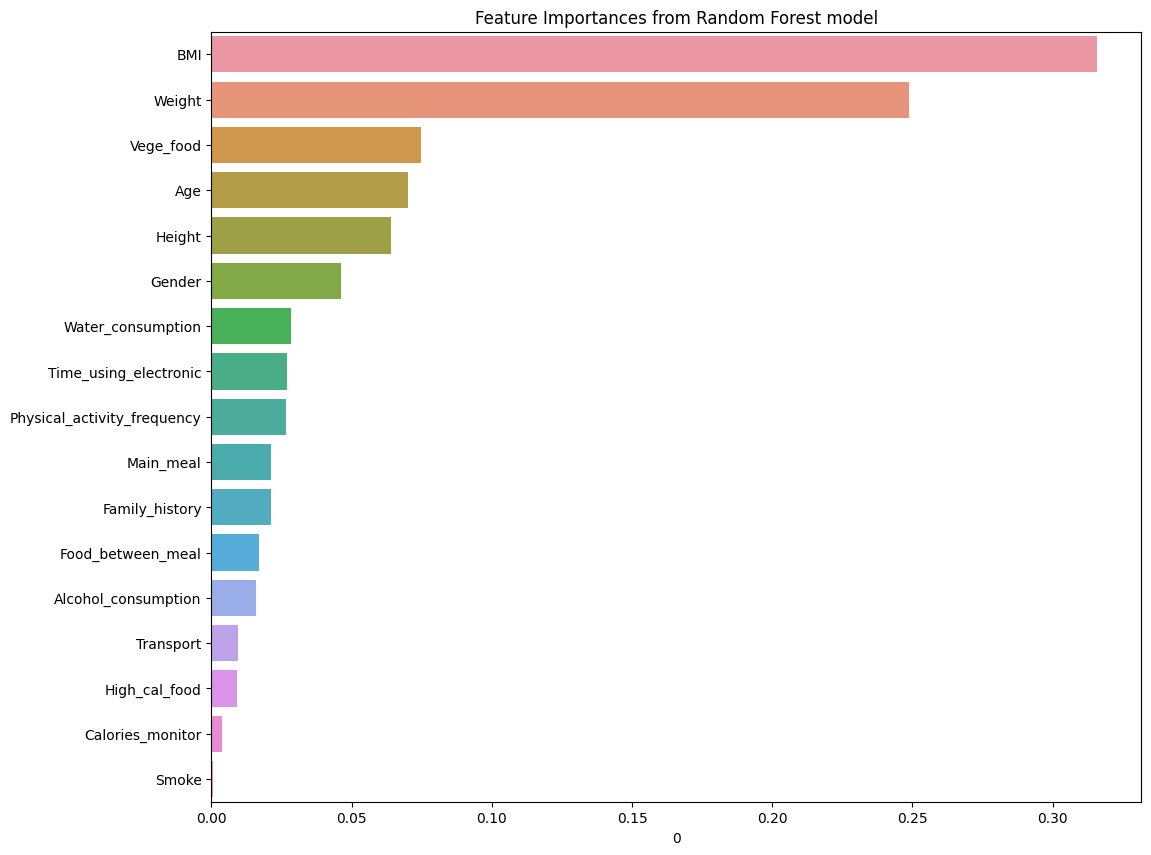

In [45]:
# Feature Importances

importances = pd.DataFrame(rf_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from Random Forest model')

In [46]:
# K-Nearest Neighbors

knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train,y_train)

knn_predict = knn_model.predict(X_valid)

knn_score = accuracy_score(knn_predict,y_valid)
print(classification_report(y_valid,knn_predict))
print(confusion_matrix(y_valid,knn_predict))
print('The accuracy of KNN is',knn_score)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       478
         1.0       0.86      0.81      0.84       630
         2.0       0.75      0.77      0.76       472
         3.0       0.75      0.81      0.78       510
         4.0       0.90      0.82      0.86       582
         5.0       0.95      0.94      0.95       673
         6.0       0.98      0.99      0.98       807

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152

[[446  28   4   0   0   0   0]
 [ 55 513  52  10   0   0   0]
 [  2  47 364  55   4   0   0]
 [  0   7  55 415  29   4   0]
 [  1   0  11  64 477  21   8]
 [  0   0   0   9  19 635  10]
 [  0   0   0   0   2   6 799]]
The accuracy of KNN is 0.8788535645472062


In [47]:
# Naive Bayes Classifier

nb_model = GaussianNB()

nb_model.fit(X_train,y_train)

nb_predict = nb_model.predict(X_valid)

nb_score = accuracy_score(nb_predict,y_valid)
print(classification_report(y_valid,nb_predict))
print(confusion_matrix(y_valid,nb_predict))
print('The accuracy of Naive Bayes Classification is',nb_score)

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87       478
         1.0       0.83      0.68      0.75       630
         2.0       0.66      0.49      0.56       472
         3.0       0.56      0.62      0.59       510
         4.0       0.69      0.68      0.68       582
         5.0       0.83      0.94      0.88       673
         6.0       0.97      1.00      0.98       807

    accuracy                           0.78      4152
   macro avg       0.76      0.76      0.76      4152
weighted avg       0.78      0.78      0.78      4152

[[451  23   2   1   0   0   1]
 [106 426  62  22   1   0  13]
 [  4  46 231 163  23   0   5]
 [  0  17  44 316 118  14   1]
 [  1   1  11  53 394 118   4]
 [  0   0   2   5  33 633   0]
 [  0   0   0   0   3   0 804]]
The accuracy of Naive Bayes Classification is 0.7839595375722543


In [48]:
# Light Gradient Boosting Machine

lgbm_model = LGBMClassifier()

lgbm_model.fit(X_train,y_train)

lgbm_predict = lgbm_model.predict(X_valid)

lgbm_score = accuracy_score(lgbm_predict,y_valid)
print(classification_report(y_valid,lgbm_predict))
print(confusion_matrix(y_valid,lgbm_predict))
print('The accuracy of Light Gradient Boosting Machine is',lgbm_score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2307
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 17
[LightGBM] [Info] Start training from score -2.094366
[LightGBM] [Info] Start training from score -1.912860
[LightGBM] [Info] Start training from score -2.139374
[LightGBM] [Info] Start training from score -2.110635
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.863915
[LightGBM] [Info] Start training from score -1.634499
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       478
         1.0       0.87      0.87      0.87       630
         2.0       0.77      0.76      0.77       472
         3.0       0.79      0.83      0.80       51

Text(0.5, 1.0, 'Feature Importances from LGBM model')

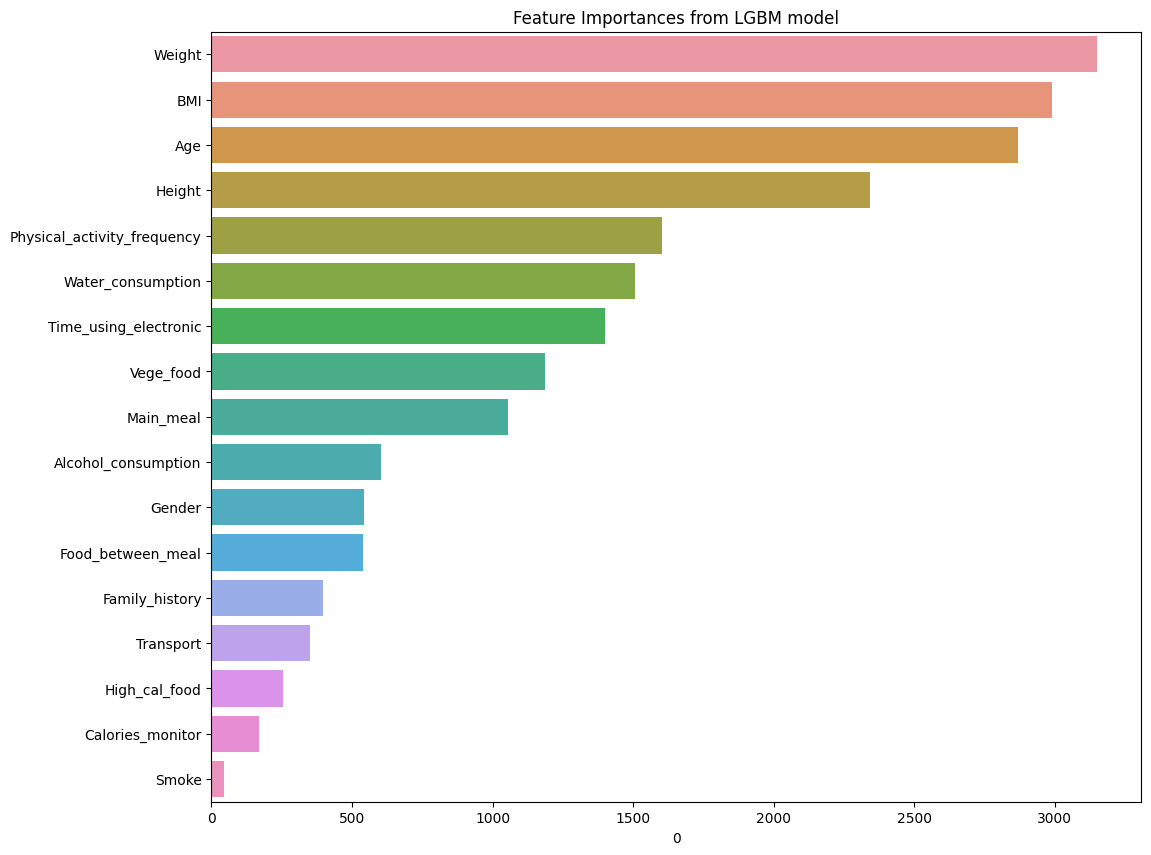

In [49]:
# Feature Importances

importances = pd.DataFrame(lgbm_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from LGBM model')

In [50]:
# eXtream Gradient Boosting 

xgb_model = XGBClassifier()

xgb_model.fit(X_train,y_train)

xgb_predict = xgb_model.predict(X_valid)

xgb_score = accuracy_score(xgb_predict,y_valid)
print(classification_report(y_valid,xgb_predict))
print(confusion_matrix(y_valid,xgb_predict))
print('The accuracy of eXtream Gradient Boosting is',xgb_score)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       478
         1.0       0.87      0.88      0.88       630
         2.0       0.80      0.77      0.78       472
         3.0       0.80      0.84      0.82       510
         4.0       0.90      0.87      0.89       582
         5.0       0.97      0.96      0.96       673
         6.0       0.99      1.00      1.00       807

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

[[445  29   4   0   0   0   0]
 [ 32 557  37   3   1   0   0]
 [  2  48 362  55   5   0   0]
 [  0   7  42 427  31   3   0]
 [  1   2  10  41 509  16   3]
 [  0   0   0   9  16 645   3]
 [  0   0   0   0   1   0 806]]
The accuracy of eXtream Gradient Boosting is 0.9034200385356455


Text(0.5, 1.0, 'Feature Importances from XGB model')

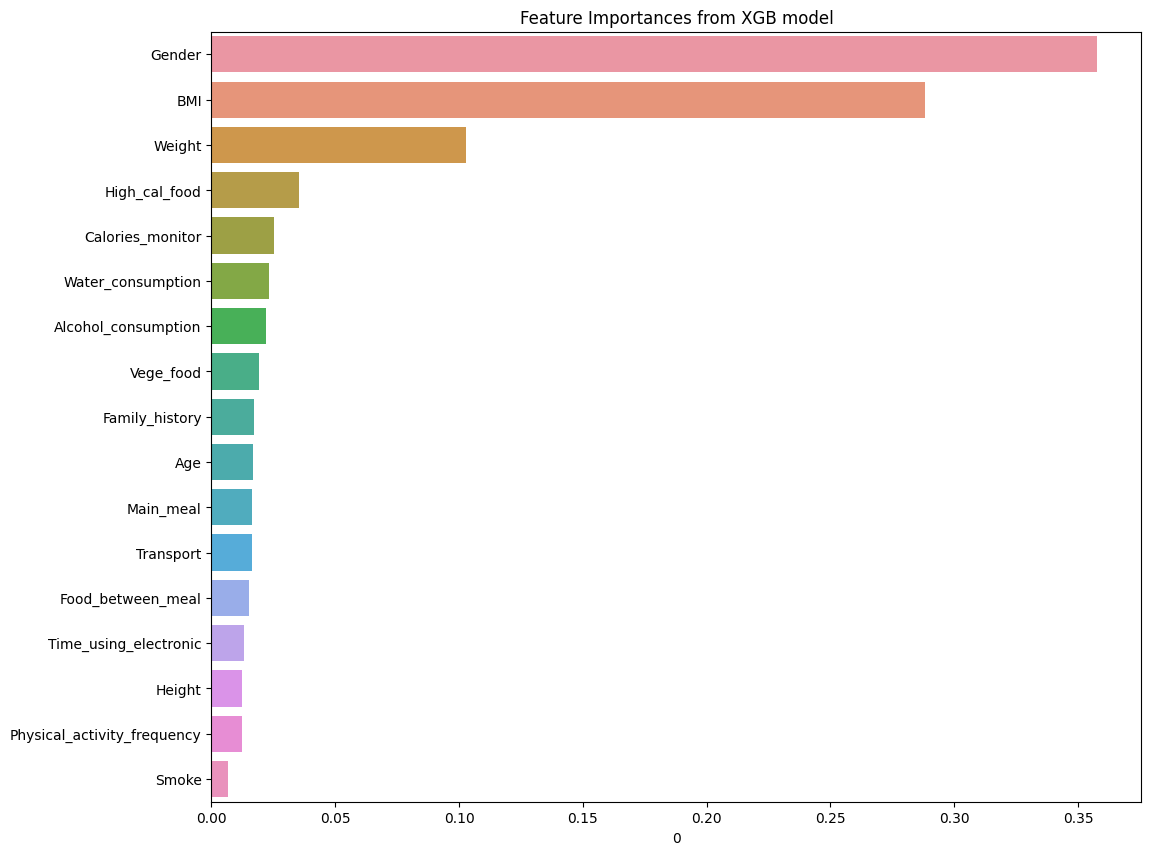

In [51]:
# Feature Importances

importances = pd.DataFrame(xgb_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from XGB model')

Text(0.5, 1.0, 'XGB')

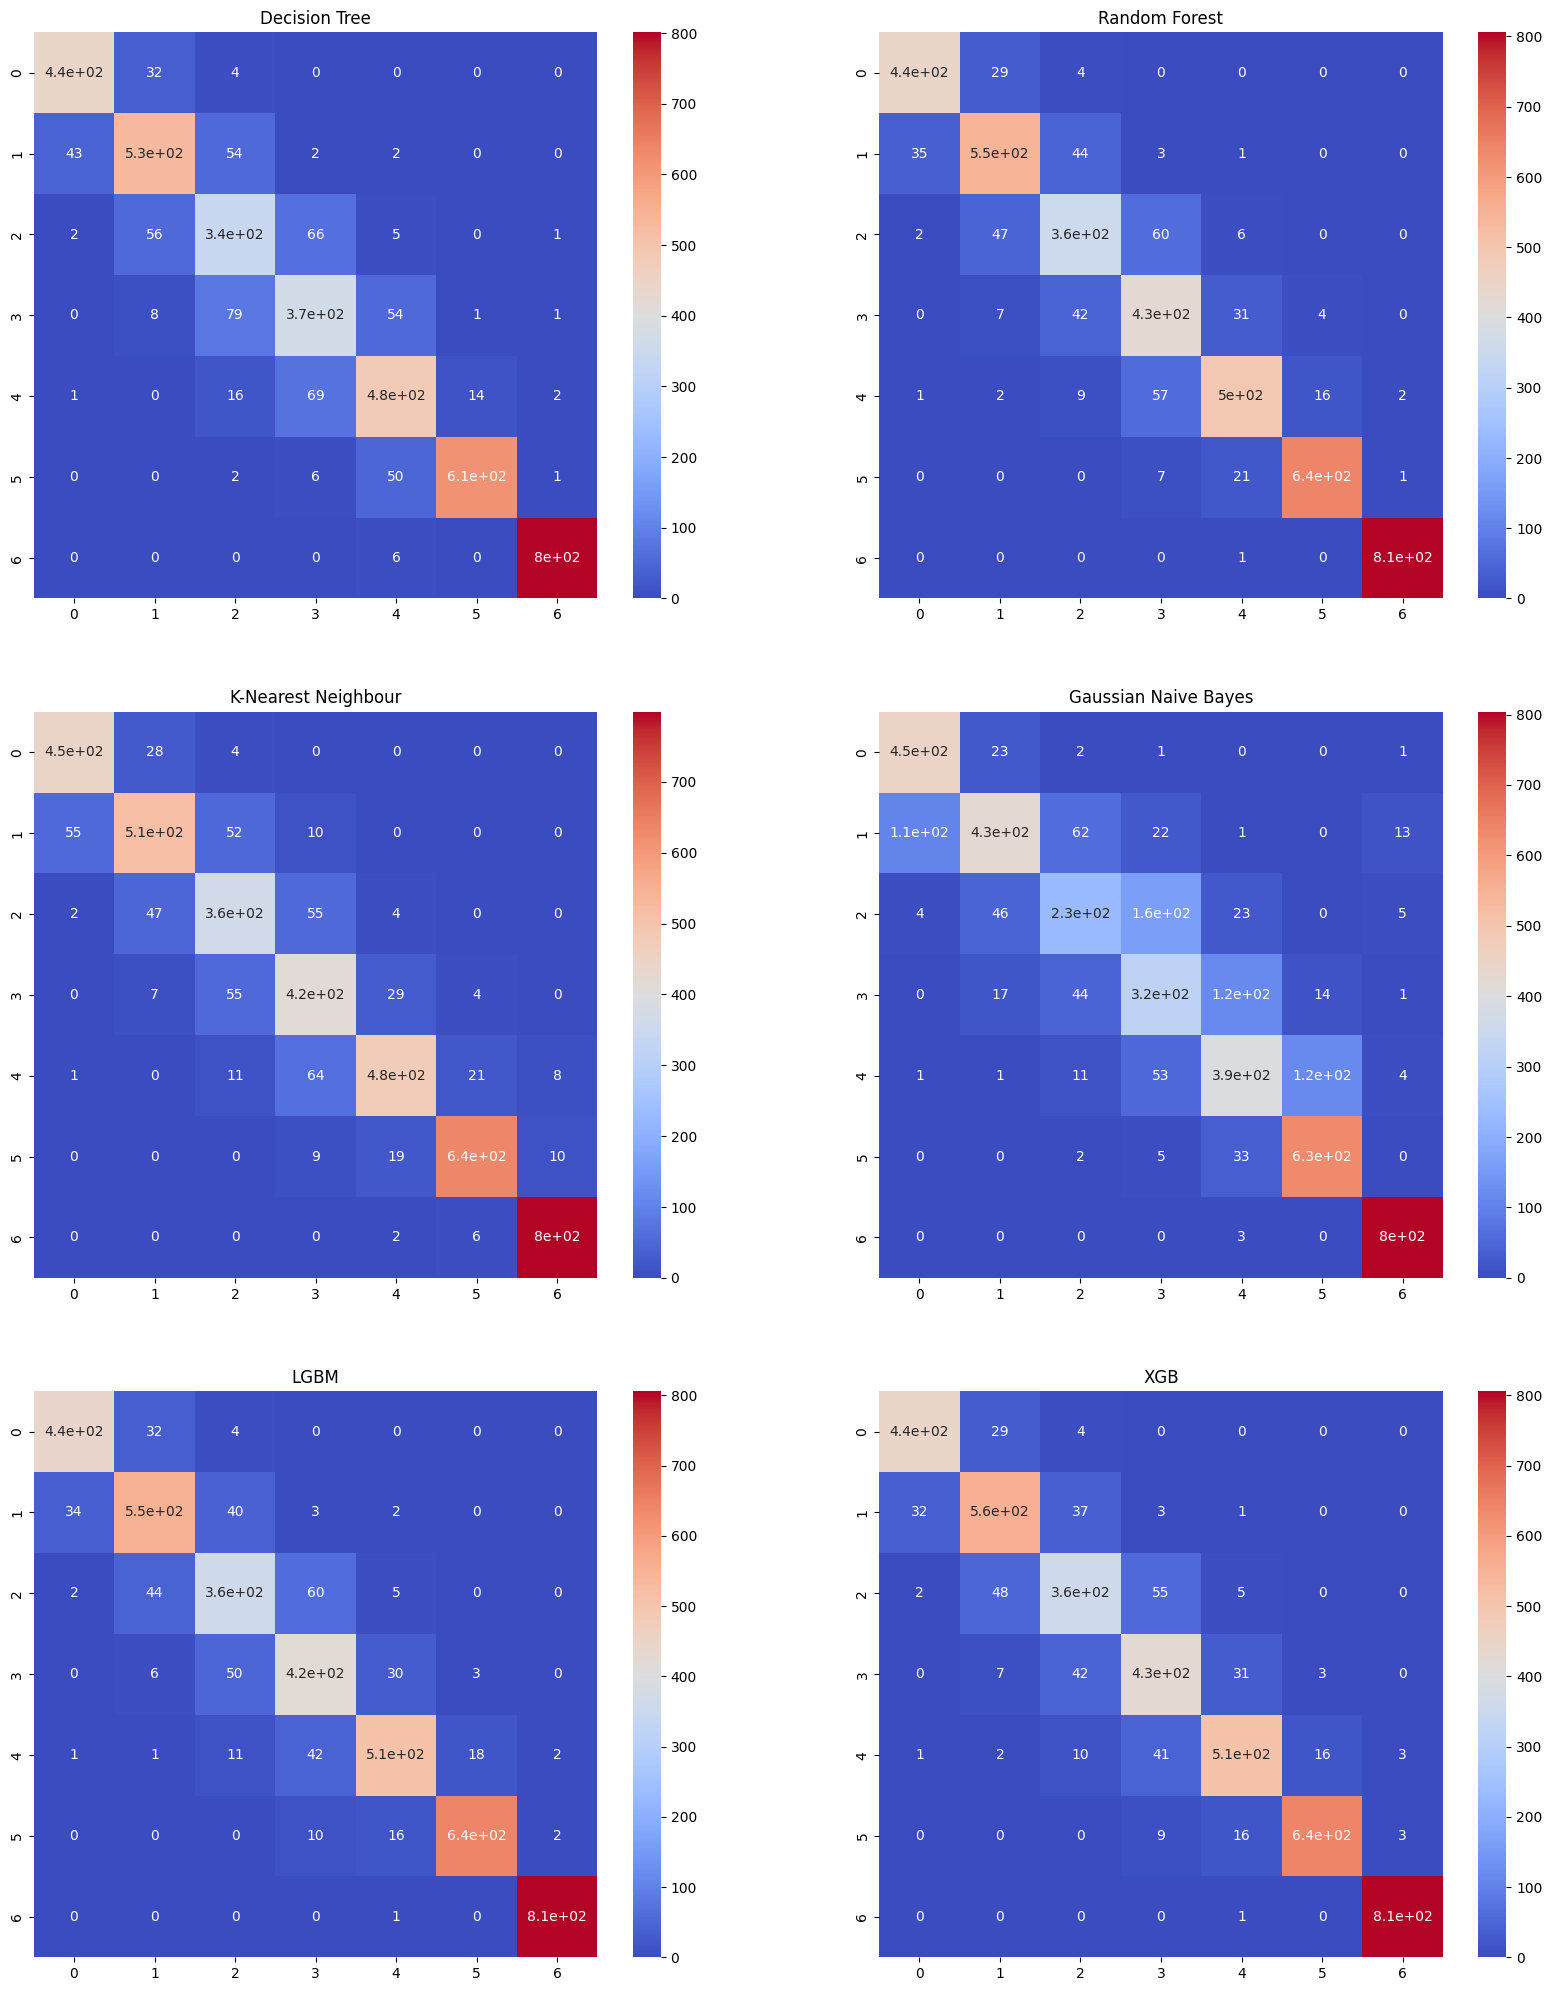

In [52]:
# Visualisation of Confusion Matrix compare between each model

fig, ax  = plt.subplots(3,2, figsize = (20,25))

sns.heatmap(confusion_matrix(y_valid, dt_predict), annot = True, cmap = 'coolwarm', ax = ax[0,0]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_valid, rf_predict), annot = True, cmap = 'coolwarm', ax = ax[0,1]).set_title('Random Forest')
sns.heatmap(confusion_matrix(y_valid, knn_predict), annot = True, cmap = 'coolwarm', ax = ax[1,0]).set_title('K-Nearest Neighbour')
sns.heatmap(confusion_matrix(y_valid, nb_predict), annot = True, cmap = 'coolwarm', ax = ax[1,1]).set_title('Gaussian Naive Bayes')
sns.heatmap(confusion_matrix(y_valid, lgbm_predict), annot = True, cmap = 'coolwarm', ax = ax[2,0]).set_title('LGBM')
sns.heatmap(confusion_matrix(y_valid, xgb_predict), annot = True, cmap = 'coolwarm', ax = ax[2,1]).set_title('XGB')

In [53]:
# Compare model accuracy

compare = pd.DataFrame({'Model': ['Decision Tree',
                                  'Random Forest',
                                  'K-Nearest Neighbour',
                                  'Gaussian Naive Bayes', 
                                  'LGBM',
                                  'XGB'], 
                        'Accuracy': [dt_score,
                                     rf_score,
                                     knn_score,
                                     nb_score,
                                     lgbm_score,
                                     xgb_score
                                    ]})

compare.sort_values(by = 'Accuracy', ascending = False)

Model  Accuracy
5                   XGB  0.903420
4                  LGBM  0.899085
1         Random Forest  0.895954
2   K-Nearest Neighbour  0.878854
0         Decision Tree  0.861031
3  Gaussian Naive Bayes  0.783960

# Hyperparameter Tuning

I will use Optuna for Hyperparameter Tuning of the model.

It takes a long time to run, so I will comment this code.

In [54]:
# # Run this code below for Hyperparameter Tuning of eXtream Gradient Boosting Classifier.

# # Define the objective function for Optuna optimization
# def objective(trial, X_train, y_train, X_valid, y_valid):
#     # Define parameters to be optimized for the RandomForestClassifier
#     param = {"objective": "multi:softmax",  
#              "eval_metric": "mlogloss",  
#              "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
#              "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
#              "max_depth": trial.suggest_int("max_depth", 3, 20), 
#              "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#              "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#              "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
#              "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 20),
#              "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
#              "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 1.0),
#              "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 1.0),
#              "random_state": 42
#             }

#     # Create an instance of XGBClassifier with the suggested parameters
#     xgb_classifier = XGBClassifier(**param)
    
#     # Fit the classifier on the training data
#     xgb_classifier.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     xgb_score = xgb_classifier.score(X_valid, y_valid)

#     return xgb_score

# # Set up the sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object for Optuna optimization
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_valid, y_valid), n_trials=100)

# # Get the best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [55]:
# After run the code above, I will get the best parameter for the model

xgb_best_params = {'n_estimators': 1312,
                   'learning_rate': 0.018279520260162645,
                   'gamma': 0.0024196354156454324,
                   'reg_alpha': 0.9025931173755949,
                   'reg_lambda': 0.06835667255875388,
                   'max_depth': 5,
                   'min_child_weight': 5,
                   'subsample': 0.883274050086088,
                   'colsample_bytree': 0.6579828557036317}

xgb_tune = XGBClassifier(**xgb_best_params)

xgb_tune.fit(X,y)

xgb_cv =cross_val_score(xgb_tune,X,y, cv = 5,scoring = "accuracy").mean()
xgb_cv

0.9100588501784049

In [56]:
# # Run this code below for Hyperparameter Tuning of Light Gradient Boosting Machine

# # Define the objective function for Optuna optimization
# def objective(trial, X_train, y_train, X_valid, y_valid):
#     # Define parameters to be optimized for the LGBMClassifier
#     param = {
#         "objective": "multiclass",
#         "metric": "multi_logloss",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "random_state": 42,
#         "num_class": 7,
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
#         "n_estimators": trial.suggest_int("n_estimators", 400, 600),
#         "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
#         "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
#         "max_depth": trial.suggest_int("max_depth", 6, 14),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
#         "subsample": trial.suggest_float("subsample", 0.8, 1.0),
#         "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
#     }

#     # Create an instance of LGBMClassifier with the suggested parameters
#     lgbm_classifier = LGBMClassifier(**param)
    
#     # Fit the classifier on the training data
#     lgbm_classifier.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     lgbm_score = lgbm_classifier.score(X_valid, y_valid)

#     return lgbm_score

# # Set up the sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object for Optuna optimization
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_valid, y_valid), n_trials=100)

# # Get the best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [57]:
# After run the code above, I will get the best parameter for the model

lgbm_best_params = {'objective': 'multiclass',    
                    'metric': 'multi_logloss',                   
                    'boosting_type': 'gbdt', 
                    'verbosity': -1,        
                    'random_state': 42,       
                    'num_class': 7,  
                    'learning_rate': 0.031246890512640613, 
                    'n_estimators': 580, 
                    'lambda_l1': 0.006715252190260552, 
                    'lambda_l2': 0.03541257240056438, 
                    'max_depth': 9, 
                    'colsample_bytree': 0.30827855982934693, 
                    'subsample': 0.9572214961677402, 
                    'min_child_samples': 29
                   }

lgbm_tune = LGBMClassifier(**lgbm_best_params)

lgbm_tune.fit(X,y)

lgbm_cv =cross_val_score(lgbm_tune,X,y, cv = 5,scoring = "accuracy").mean()
lgbm_cv

0.9092881140603118

In [58]:
# # Run this code below for Hyperparameter Tuning of Random Forest Classifier

# Define the objective function for Optuna optimization
# def objective(trial, X_train, y_train, X_valid, y_valid):
#     # Define parameters to be optimized for the RandomForestClassifier
#     param = {"n_estimators": trial.suggest_int("n_estimators", 100, 500),
#              "max_depth": trial.suggest_int("max_depth", 3, 50),
#              "max_features" = trial.suggest_categorical(name="max_features", choices=['auto', 'sqrt']), 
#              "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 20),
#              "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
#              }

#     # Create an instance of LGBMClassifier with the suggested parameters
#     rf_classifier = RandomForestClassifier(**param)
    
#     # Fit the classifier on the training data
#     rf_classifier.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     rf_score = rf_classifier.score(X_valid, y_valid)

#     return rf_score

# # Split the data into training and test sets
# #X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size as needed

# # Set up the sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object for Optuna optimization
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_valid, y_valid), n_trials=100)

# # Get the best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [59]:
# After run the code above, I will get the best parameter for the model

rf_best_params = {'n_estimators': 230, 
                  'max_depth': 28,
                  'min_samples_leaf':2,
                  'min_samples_split':2 }

rf_tune = RandomForestClassifier(**rf_best_params) 

rf_tune.fit(X,y)

rf_cv = cross_val_score(rf_tune,X,y, cv = 5,scoring = "accuracy").mean()
rf_cv

0.9008576409148107

In [60]:
# Compare model after Hyperparameter tuning

scores_list=[]

scores_list = [["XGB",xgb_cv],
               ["LGBM",lgbm_cv],
               ["RF",rf_cv], 
              ]

scores = (pd.DataFrame(scores_list,columns = ["Model", "CV Mean"])).sort_values(by=["CV Mean"], ascending=False )

scores

Model   CV Mean
0   XGB  0.910059
1  LGBM  0.909288
2    RF  0.900858

# Voting Classifier

In [61]:
# Define estimators
estimators = [('LGBM',lgbm_tune),
              ('XGB', xgb_tune),
             ]

voting_model = VotingClassifier(estimators=estimators,
                                voting='soft')

voting_soft = voting_model.fit(X, y)

voting_cv = cross_val_score(voting_model,X,y, cv = 5,
                            scoring = "accuracy").mean()

voting_cv

0.9104441834244736

In [62]:
# Make predictions on the test dataset

voting_predict = voting_model.predict(df_test)


In [63]:
# Create a submission file

submission_df = pd.DataFrame({'id': sample_submission['id'],
                              'NObeyesdad': voting_predict})

unmapping = {0:'Insufficient_Weight',
             1:'Normal_Weight',
             2:'Overweight_Level_I',
             3:'Overweight_Level_II',
             4:'Obesity_Type_I',
             5:'Obesity_Type_II',
             6:'Obesity_Type_III',
             }
    
submission_df['NObeyesdad'] = submission_df['NObeyesdad'].map(unmapping)

submission_df.to_csv('submission.csv', index=False)

submission_df.head(10)

id           NObeyesdad
0  20758      Obesity_Type_II
1  20759   Overweight_Level_I
2  20760     Obesity_Type_III
3  20761       Obesity_Type_I
4  20762     Obesity_Type_III
5  20763  Insufficient_Weight
6  20764  Insufficient_Weight
7  20765        Normal_Weight
8  20766  Overweight_Level_II
9  20767        Normal_Weight